# Исследование данных о российском кинопрокате



## Описание задачи

### Цель и задачи исследования

**Цель:** Выявить факторы, влияющие на интерес зрителей к фильмам.

**Задачи (этапы) исследования:**
1. Провести общий обзор данных.
2. Провести предобработку данных, в т.ч.:
- выявить и устранить (заполнить, где это возможно) пропуски в данных;
- изменить типы данных при необходимости;
- выявить и устранить явные и неявные дубликаты в данных.
3. Провести расчет необходимых производных показателей.
4. Провести исследовательский анализ данных, в т.ч.:
- изучить параметры и устранить аномальные значения и выбросы;
- выявить динамику проката фильмов по годам;
- выявить влияние возрастного ограничения на сборы в прокате.
5. Отдельно изучить фильмы, которые получили государственную поддержку, в т.ч.
- провести анализ объемов господдержки в динамике;
- изучить окупаемость фильмов с господдержкой;
- провести анализ связи объемов господдержки с показателями интереса зрителей (сборы, рейтинг).

### Описание данных

**Источник данных**: портал открытых данных Министерства культуры.

Столбцы в таблице **mkrf_movies**:
- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.

Столбцы в таблице **mkrf_shows**:
- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях.

## Общий обзор данных

### Загрузка данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Снимем ограничение на максимальное число столбцов в выводе.

In [ ]:
pd.options.display.max_columns = None

Загрузим таблицы и выведем их описание.

In [ ]:
try:
    movies_data = pd.read_csv('...')
except:
    movies_data = pd.read_csv('...')

try:
    shows_data = pd.read_csv('...')
except:
    shows_data = pd.read_csv('...')

In [ ]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [ ]:
shows_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


### Объединение таблиц

Ключевым столбцом в обоих таблицах является puNumber. Однако он имеет разные типы: в movies_data - object, в shows_data - int. Приведем его к единому типу - на данном этапе str.

In [ ]:
shows_data['puNumber'] = shows_data['puNumber'].astype('str')

Объединим таблицы методом left, чтобы сохранить все записи из исходной таблицы movies_data.

In [ ]:
movies_data = movies_data.merge(shows_data, on ='puNumber', how='left')

### Обзор данных

In [ ]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Мы видим, что в ряде столбцов есть пропуски. Кроме того, типы данных некоторых столбцов не соответствуют нашим предположениям исходя из описания данных.

## Предобработка данных

### Заполнение пропусков

Рассчитаем количество и доли пропусков по столбцам.

In [ ]:
movies_data.isna().agg(['sum', 'mean']).T

,sum,mean
title,0.0,0.000000
puNumber,0.0,0.000000
show_start_date,0.0,0.000000
type,0.0,0.000000
film_studio,18.0,0.002404
production_country,2.0,0.000267
director,9.0,0.001202
producer,568.0,0.075875
age_restriction,0.0,0.000000
refundable_support,7154.0,0.955651


Мы видим, что в ряде столбцов, связанных с финансированием и бюджетом, доля пропусков крайне велика. Это можно объяснить тем, что в исходной базе Минкульта есть "финансовые" данные только по фильмам с господдержкой.

Рассмотрим по очереди столбцы с пропусками.

#### Столбец film_studio

Выведем первые 5 записей, по которым в данном столбце есть пропуски.

In [ ]:
movies_data[movies_data['film_studio'].isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03T12:00:00.000Z,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25T12:00:00.000Z,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10T12:00:00.000Z,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01T12:00:00.000Z,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15T12:00:00.000Z,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Поскольку самостоятельный поиск информации потребует достаточно больших трудозатрат, заменим пропуски на "Не указано".

In [ ]:
movies_data['film_studio'] = movies_data['film_studio'].fillna('Не указано')

In [ ]:
movies_data['film_studio'].isna().sum()

0

Пропуски заполнены.

#### Столбец production_country

Выведем первые 5 записей, по которым в данном столбце есть пропуски.

In [ ]:
movies_data[movies_data['production_country'].isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09T12:00:00.000Z,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25T12:00:00.000Z,Художественный,Не указано,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Записей немного, можно самостоятельно восстановить пропущенные значения. Поиск в Интернете говорит, что эти фильмы были сняты в России. Заменим пропуски на "Россия".

In [ ]:
movies_data['production_country'] = movies_data['production_country'].fillna('Россия')

In [ ]:
movies_data['production_country'].isna().sum()

0

Пропуски заполнены.

#### Столбец director

Выведем первые 5 записей, по которым в данном столбце есть пропуски.

In [ ]:
movies_data[movies_data['director'].isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04T12:00:00.000Z,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.0
1735,Помпеи. Британский музей,126003413,2013-09-11T12:00:00.000Z,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24T12:00:00.000Z,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22T12:00:00.000Z,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20T12:00:00.000Z,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Поскольку самостоятельный поиск информации потребует достаточно больших трудозатрат, заменим пропуски на "Не указано".

In [ ]:
movies_data['director'] = movies_data['director'].fillna('Не указано')

In [ ]:
movies_data['director'].isna().sum()

0

Пропуски заполнены.

#### Столбец producer

Выведем первые 5 записей, по которым в данном столбце есть пропуски.

In [ ]:
movies_data[movies_data['producer'].isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"боевик,драма,приключения",NaN


Поскольку самостоятельный поиск информации потребует достаточно больших трудозатрат, заменим пропуски на "Не указано".

In [ ]:
movies_data['producer'] = movies_data['producer'].fillna('Не указано')

In [ ]:
movies_data['producer'].isna().sum()

0

Пропуски заполнены.

#### Столбцы refundable_support, nonrefundable_support

Выведем первые 5 записей, по которым в данных столбцах есть пропуски.

In [ ]:
movies_data[(movies_data['refundable_support'].isna()) | (movies_data['nonrefundable_support'].isna())].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Не указано,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Поскольку в этих столбцах содержатся значения о суммах господдержки, логично предположить, что там, где значения отсутствуют, господдержка не оказывалась. Поэтому заменим пропуски на 0.

In [ ]:
movies_data[['refundable_support', 'nonrefundable_support']] = \
movies_data[['refundable_support', 'nonrefundable_support']].fillna(0)

In [ ]:
movies_data[['refundable_support', 'nonrefundable_support']].isna().sum()

refundable_support       0
nonrefundable_support    0
dtype: int64

Пропуски заполнены.

#### Столбец budget

Выведем первые 5 записей, по которым в данном столбце есть пропуски.

In [ ]:
movies_data[movies_data['budget'].isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Не указано,«6+» - для детей старше 6 лет,0.0,0.0,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Теоретически можно было бы заменить пропуски на 0, но это приведет к искажению статистики. Поэтому оставим их как есть.

#### Столбец financing_source

Выведем первые 5 записей, по которым в данном столбце есть пропуски.

In [ ]:
movies_data[movies_data['financing_source'].isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Не указано,«6+» - для детей старше 6 лет,0.0,0.0,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Рассмотрим уникальные значения в этом столбце.

In [ ]:
movies_data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Поскольку значения в столбце характеризуют источник господдержки, можно предположить, что там, где они не указаны, имеет место частное (коммерческое) финансирование. Проверим эту гипотезу.

In [ ]:
movies_data.query('refundable_support+nonrefundable_support>0 and financing_source.isna()')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Несоответствий между столбцами не выявлено, поэтому заменим пропуски в financing_source на "Частный".

In [ ]:
movies_data['financing_source'] = movies_data['financing_source'].fillna('Частный')

In [ ]:
movies_data['financing_source'].isna().sum()

0

Пропуски заполнены.

#### Столбец budget

Выведем первые 5 записей, по которым в данном столбце есть пропуски.

In [ ]:
movies_data[movies_data['budget'].isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,NaN,Частный,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Не указано,«6+» - для детей старше 6 лет,0.0,0.0,NaN,Частный,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,Частный,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,Частный,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,Частный,6.8,"фантастика,боевик,триллер",NaN


Теоретически можно было бы заменить пропуски на 0, но это приведет к искажению статистики. Поэтому оставим их как есть.

#### Столбец ratings

Выведем первые 5 записей, по которым в данном столбце есть пропуски.

In [ ]:
movies_data[movies_data['ratings'].isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14T12:00:00.000Z,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,0.0,0.0,NaN,Частный,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",Не указано,«6+» - для детей старше 6 лет,0.0,0.0,NaN,Частный,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25T12:00:00.000Z,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,0.0,0.0,NaN,Частный,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28T12:00:00.000Z,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,Не указано,«0+» - для любой зрительской аудитории,0.0,0.0,NaN,Частный,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,Не указано,«12+» - для детей старше 12 лет,0.0,0.0,NaN,Частный,NaN,NaN,NaN


Логическим образом заполнить пропуски здесь невозможно, поэтому оставим как есть.

#### Столбец genres

Выведем первые 5 записей, по которым в данном столбце есть пропуски.

In [ ]:
movies_data[movies_data['genres'].isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14T12:00:00.000Z,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,0.0,0.0,NaN,Частный,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",Не указано,«6+» - для детей старше 6 лет,0.0,0.0,NaN,Частный,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25T12:00:00.000Z,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,0.0,0.0,NaN,Частный,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28T12:00:00.000Z,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,Не указано,«0+» - для любой зрительской аудитории,0.0,0.0,NaN,Частный,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,Не указано,«12+» - для детей старше 12 лет,0.0,0.0,NaN,Частный,NaN,NaN,NaN


Поскольку самостоятельный поиск информации потребует достаточно больших трудозатрат, заменим пропуски на "Не указано".

In [ ]:
movies_data['genres'] = movies_data['genres'].fillna('Не указано')

In [ ]:
movies_data['genres'].isna().sum()

0

Пропуски заполнены.

#### Столбец box_office

Выведем первые 5 записей, по которым в данном столбце есть пропуски.

In [ ]:
movies_data[movies_data['box_office'].isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,NaN,Частный,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Не указано,«6+» - для детей старше 6 лет,0.0,0.0,NaN,Частный,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,Частный,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,Частный,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,Частный,6.8,"фантастика,боевик,триллер",NaN


Теоретически можно было бы заменить пропуски на 0, но это приведет к искажению статистики. Поэтому оставим как есть.

#### Промежуточный вывод

Мы заменили пропуски в столбцах film_studio, production_country, director, producer, refundable_support, nonrefundable_support, financing_source и genres. В столбцах budget, ratings и box_office оставили пропуски как есть, чтобы не искажать статистику в последующем анализе.

### Изменение типов данных

Еще раз рассмотрим информацию по датафрейму.

In [ ]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7486 non-null   object 
 5   production_country     7486 non-null   object 
 6   director               7486 non-null   object 
 7   producer               7486 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     7486 non-null   float64
 10  nonrefundable_support  7486 non-null   float64
 11  budget                 332 non-null    float64
 12  financing_source       7486 non-null   object 
 13  ratings                6519 non-null   object 
 14  genres                 7486 non-null   object 
 15  box_

Исходя из описания данных рассмотрим возможность замены данных в столбцах:
- puNumber, refundable_support, nonrefundable_support, budget -> int;
- show_start_date -> datetime;
- ratings -> float.

#### Столбец puNumber

Выведем значения, которые не состоят полностью из цифр.

In [ ]:
list(movies_data['puNumber'][~movies_data['puNumber'].str.isdigit()].unique())

[' 111004112', 'нет']

Уберем пробелы и заменим "нет" на 0.

In [ ]:
movies_data['puNumber'] = movies_data['puNumber'].str.strip().replace('нет', 0)

Теперь можно преобразовать тип столбца в int.

In [ ]:
movies_data['puNumber'] = movies_data['puNumber'].astype('int')

In [ ]:
print(movies_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7486 non-null   object 
 5   production_country     7486 non-null   object 
 6   director               7486 non-null   object 
 7   producer               7486 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     7486 non-null   float64
 10  nonrefundable_support  7486 non-null   float64
 11  budget                 332 non-null    float64
 12  financing_source       7486 non-null   object 
 13  ratings                6519 non-null   object 
 14  genres                 7486 non-null   object 
 15  box_

Тип преобразован.

#### Столбцы refundable_support, nonrefundable_support

Преобразуем тип столбцов в int.

In [ ]:
movies_data[['refundable_support', 'nonrefundable_support']] = \
movies_data[['refundable_support', 'nonrefundable_support']].astype('int')

In [ ]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7486 non-null   object 
 5   production_country     7486 non-null   object 
 6   director               7486 non-null   object 
 7   producer               7486 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     7486 non-null   int64  
 10  nonrefundable_support  7486 non-null   int64  
 11  budget                 332 non-null    float64
 12  financing_source       7486 non-null   object 
 13  ratings                6519 non-null   object 
 14  genres                 7486 non-null   object 
 15  box_

Тип преобразован.

#### Столбец budget

Данный столбец можно было бы преобразовать в int, но в нем мы намеренно оставили пропуски, поэтому оставим тип как есть.

#### Столбец show_start_date

Переведем в формат даты, оставив только год, месяц и день (часы, минуты и секунды нам неважны).

In [ ]:
movies_data['show_start_date'] = pd.to_datetime(movies_data['show_start_date'], format='%Y-%m-%d', exact=False)

In [ ]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7486 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     7486 non-null   int64              
 10  nonrefundable_support  7486 non-null   int64              
 11  budget                 332 non-null    float64          

Тип преобразован.

#### Столбец ratings

Выведем уникальные значения.

In [ ]:
movies_data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

В столбце встречаются два разных формата рейтинга: в десятичных числах и в процентах. Целесообразно привести все в формат десятичных чисел.

Уберем знаки процента.

In [ ]:
movies_data['ratings'] = movies_data['ratings'].str.replace('%', '')

Преобразуем тип столбца в float.

In [ ]:
movies_data['ratings'] = movies_data['ratings'].astype('float')

In [ ]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7486 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     7486 non-null   int64              
 10  nonrefundable_support  7486 non-null   int64              
 11  budget                 332 non-null    float64          

Тип преобразован.

Переведем рейтинги, ранее указанные в процентах (т.е. те, что выше 10), в десятичные числа.

In [ ]:
movies_data.loc[movies_data['ratings'] >= 10, 'ratings'] /= 10

In [ ]:
movies_data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

Форматы рейтингов унифицированы.

#### Промежуточный вывод

Мы преобразовали типы данных в столбцах puNumber, refundable_support, nonrefundable_support в int; show_start_date - перевели в формат datetime; в столбце ratings унифицировали формат рейтингов и преобразовали в float. Тип данных в столбце budget не преобразовывали, т.к. там есть пропуски.

### Обработка дубликатов

Рассмотрим явные полные дубликаты.

In [ ]:
movies_data[movies_data.duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Таких дубликатов нет.

Посчитаем доли уникальных значений в столбцах.

In [ ]:
movies_data.nunique()/movies_data.count()*100

title                    90.462196
puNumber                 99.973283
show_start_date          26.248998
type                      0.106866
film_studio              73.350254
production_country       12.690355
director                 64.279989
producer                 71.466738
age_restriction           0.066791
refundable_support        0.454181
nonrefundable_support     1.001870
budget                   87.349398
financing_source          0.053433
ratings                   1.288541
genres                    9.925194
box_office               93.033566
dtype: float64

В ряде некатегориальных столбцов доля уникальных значений невысока, возможно, там есть дубликаты. Особенно обращает на себя внимание то, что в столбце puNumber не все значения уникальные, хотя этот столбец является ключевым. Категориальные столбцы тоже следует проверить на наличие неявных дубликатов.

#### Столбец puNumber

Рассмотрим записи с повторяющимися значениями puNumber.

In [ ]:
movies_data[movies_data.duplicated(subset='puNumber', keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0,0,NaN,Частный,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0,0,NaN,Частный,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0,0,NaN,Частный,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0,0,NaN,Частный,6.8,"комедия,криминал",NaN


Мы видим, что разные фильмы имеют одинаковое значение puNumber, что может быть обусловлено технической ошибкой при выгрузке данных или ошибкой оператора. Необходимо заменить у дубликатов значения puNumber.

Составим список таких дубликатов.

In [ ]:
duplicated_puNumbers = movies_data[movies_data.duplicated(subset='puNumber')]['puNumber']

Найдем и присвоим каждому дубликату ближайший к нему "свободный" номер puNumber.

In [ ]:
for index in duplicated_puNumbers.index:
    puNumber = duplicated_puNumbers.loc[index]
    while movies_data['puNumber'].isin([puNumber]).any():
        puNumber += 1
    movies_data.loc[index, 'puNumber'] = puNumber

In [ ]:
movies_data.loc[duplicated_puNumbers.index]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4639,Иоанна - женщина на папском престоле /По роман...,221154311,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0,0,NaN,Частный,7.6,"драма,мелодрама,история",NaN
5068,Анализируй то!,221054411,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0,0,NaN,Частный,6.8,"комедия,криминал",NaN


Значения puNumber заменены.

#### Столбцы title + show_start_date

Рассмотрим дубликаты, в которых повторяются название и дата проката.

In [ ]:
movies_data[movies_data.duplicated(subset=['title', 'show_start_date'], keep=False)].sort_values('title').head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3086,Анархисты,221003916,2016-02-03 12:00:00+00:00,Художественный,"24 Май Продюксьон, Франс 2 Синема",Франция,Эли Важеман,Лола Гэнс,«16+» - для детей старше 16 лет,0,0,NaN,Частный,5.7,драма,NaN
3087,Анархисты,121002316,2016-02-03 12:00:00+00:00,Художественный,"24 Май Продюксьон, Франс 2 Синема",Франция,Эли Важеман,Лола Гэнс,«16+» - для детей старше 16 лет,0,0,NaN,Частный,5.7,драма,332371.0
4042,Бугай,224021210,2010-09-24 12:00:00+00:00,Анимационный,"Иллюзион Студиос, Процесо",Мексика-Аргентина,Густаво Кова,"Хуго Е. Лаура, Хосе Луис Масса",«16+» - для детей старше 16 лет,0,0,NaN,Частный,6.6,"мультфильм,боевик,триллер",NaN
4043,Бугай,124001210,2010-09-24 12:00:00+00:00,Анимационный,"Иллюзион Студиос, Процесо",Мексика-Аргентина,Густаво Кова,"Хуго Е. Лаура, Хосе Луис Масса",«16+» - для детей старше 16 лет,0,0,NaN,Частный,6.6,"мультфильм,боевик,триллер",NaN
6428,Зоя,111022618,2018-11-25 12:00:00+00:00,Художественный,Тарханова Юлия Олеговна,Россия,О.Товма,Ю.Тарханова,«16+» - для детей старше 16 лет,0,0,NaN,Частный,3.9,"история,биография,военный",NaN
6429,Зоя,111022718,2018-11-25 12:00:00+00:00,Художественный,Тарханова Юлия Олеговна,Россия,О.Товма,Ю.Тарханова,«16+» - для детей старше 16 лет,0,0,NaN,Частный,3.9,"история,биография,военный",NaN
1475,Оторвы,121006514,2014-04-07 12:00:00+00:00,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,0,0,NaN,Частный,3.5,"комедия,приключения",NaN
1476,Оторвы,221013214,2014-04-07 12:00:00+00:00,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,0,0,NaN,Частный,3.5,"комедия,приключения",NaN
2752,Пингвиненок Пороро: Большие гонки,224001915,2015-04-15 12:00:00+00:00,Анимационный,"Окон Студиос, Чина Филм, Симка Интертейнмент, ...",Южная Корея - КНР,Юнг Куюн Парк,"Иль Хо Ким, Михал Симка",«0+» - для любой зрительской аудитории,0,0,NaN,Частный,5.2,"мультфильм,семейный,спорт",1360.0
2753,Пингвиненок Пороро: Большие гонки,124001915,2015-04-15 12:00:00+00:00,Анимационный,"Окон Студиос, Чина Филм, Симка Интертейнмент, ...",Южная Корея - КНР,Юнг Куюн Парк,"Иль Хо Ким, Михал Симка",«0+» - для любой зрительской аудитории,0,0,NaN,Частный,5.2,"мультфильм,семейный,спорт",14152495.9


Мы видим, что отличия есть только в столбце box_office. Запишем в этот столбец сумму по всем записям с одинаковыми названием (добавим параметр min_count=1, чтобы не получить нули при суммировании NaN) и датой проката и удалим дубликаты.

In [ ]:
movies_data['box_office'] = movies_data.groupby(['title', 'show_start_date'])['box_office'].transform('sum', min_count=1)

In [ ]:
movies_data = movies_data.drop_duplicates(subset=['title', 'show_start_date'])

In [ ]:
movies_data[movies_data.duplicated(subset=['title', 'show_start_date'], keep=False)].sort_values('title').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [ ]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7478 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7478 non-null   object             
 1   puNumber               7478 non-null   int64              
 2   show_start_date        7478 non-null   datetime64[ns, UTC]
 3   type                   7478 non-null   object             
 4   film_studio            7478 non-null   object             
 5   production_country     7478 non-null   object             
 6   director               7478 non-null   object             
 7   producer               7478 non-null   object             
 8   age_restriction        7478 non-null   object             
 9   refundable_support     7478 non-null   int64              
 10  nonrefundable_support  7478 non-null   int64              
 11  budget                 332 non-null    float64          

Дубликаты устранены.

#### Столбцы title + director

Рассмотрим дубликаты, в которых повторяются название и режиссер.

In [ ]:
movies_data[movies_data.duplicated(subset=['title', 'director'], keep=False)].sort_values('title').head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
455,100 миллионов евро,121013712,2012-06-06 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,0,0,NaN,Частный,6.1,комедия,NaN
454,100 миллионов евро,221024616,2016-05-25 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,0,0,NaN,Частный,6.1,комедия,NaN
4852,127 часов,121000811,2011-01-27 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,0,0,NaN,Частный,7.7,"триллер,биография,драма",NaN
5058,127 часов,221069011,2011-05-18 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,0,0,NaN,Частный,7.7,"триллер,биография,драма",NaN
3129,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19 12:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,0,0,NaN,Частный,6.7,"боевик,триллер,драма",NaN
3130,13 часов: Тайные солдаты Бенгази,121001016,2016-01-15 12:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,0,0,NaN,Частный,6.7,"боевик,триллер,драма",18439240.55
1493,13-й район: Кирпичные особняки,221033314,2014-08-20 12:00:00+00:00,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,0,0,NaN,Частный,5.5,"боевик,криминал",NaN
1494,13-й район: Кирпичные особняки,121008314,2014-04-25 12:00:00+00:00,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,0,0,NaN,Частный,5.5,"боевик,криминал",750.00
4107,13.,221123710,2010-10-25 12:00:00+00:00,Художественный,"Барбариан Филмз, Магнет Медиа Групп, Морабито ...",США,Гела Баблуани,Не указано,«16+» - для детей старше 16 лет,0,0,NaN,Частный,6.8,"триллер,драма,криминал",NaN
4307,13.,121018110,2010-09-30 12:00:00+00:00,Художественный,"Барбариан Филмз, Магнет Медиа Групп, Морабито ...",США,Гела Баблуани,Не указано,«16+» - для детей старше 16 лет,0,0,NaN,Частный,6.8,"триллер,драма,криминал",NaN


Мы видим отличия в show_start_date и box_office. Возможно, фильм выходил в прокат несколько раз. Поскольку дата проката важна для нас, оставим эти дубликаты как есть.

#### Столбец title

Посчитаем долю уникальных значений.

In [ ]:
movies_data['title'].nunique()/movies_data['title'].count()*100

90.5589729874298

На всякий случай уберем лишние пробелы.

In [ ]:
movies_data['title'] = movies_data['title'].str.strip().replace('\s+', ' ', regex=True)

Поскольку доля уникальных значений велика, анализ на неявные дубликаты возможен только вручную, что потребует больших трудозатрат. Для нашего дальнейшего анализа конкретное название фильма не слишком важно, поэтому оставим значения в столбце как есть.

#### Столбец type

Рассмотрим уникальные значения столбца.

In [ ]:
list(movies_data['type'].unique())

['Художественный',
 'Анимационный',
 'Прочие',
 'Документальный',
 'Научно-популярный',
 ' Художественный',
 ' Анимационный',
 'Музыкально-развлекательный']

Уберем лишние пробелы.

In [ ]:
movies_data['type'] = movies_data['type'].str.strip()

In [ ]:
movies_data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Лишние пробелы убраны.

#### Столбец film_studio

Посчитаем долю уникальных значений.

In [ ]:
movies_data['film_studio'].nunique()/movies_data['film_studio'].count()*100

73.42872425782295

In [ ]:
movies_data['film_studio'].head(10)

0    Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...
1                                Киностудия "Мосфильм"
2    Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...
3    Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...
4    Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...
5                                Киностудия "Мосфильм"
6                                Киностудия "Мосфильм"
7    Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...
8                       Пульсар Продюксьон, ТФ1 Фильм 
9               Киностудия "Мосфильм", Телевидение ВНР
Name: film_studio, dtype: object

Поскольку в столбце может быть указано несколько студий, а доля уникальных значений велика, анализ на неявные дубликаты возможен только вручную, что потребует больших трудозатрат. Для нашего дальнейшего анализа студия не слишком важна, поэтому оставим значения в столбце как есть.

#### Столбец production_country

Посчитаем долю уникальных значений.

In [ ]:
movies_data['production_country'].nunique()/movies_data['production_country'].count()*100

12.70393153249532

Рассмотрим уникальные значения столбца.

In [ ]:
sorted(movies_data['production_country'].unique())

[' СССР',
 ' СССР ',
 ' СССР   ',
 '2019',
 'CША',
 'Австралия',
 'Австралия - Великобритания - Бельгия - Индия',
 'Австралия - Германия',
 'Австралия - Ирландия',
 'Австралия - Колумбия',
 'Австралия - США',
 'Австралия, Канада',
 'Австралия, США',
 'Австралия-Великобритания',
 'Австралия-Ирландия',
 'Австралия-США',
 'Австралия-Турция-США',
 'Австрия',
 'Австрия - Германия',
 'Австрия - Германия - Франция',
 'Австрия - Люксембург',
 'Австрия, Великобритания, Германия',
 'Австрия-Германия-Франция',
 'Австрия-Франция-Германия',
 'Азербайджан-Россия',
 'Аргентина',
 'Аргентина - Бразилия',
 'Аргентина - Испания',
 'Аргентина - Испания - Уругвай',
 'Аргентина - Мексика - Бразилия - Франция - США',
 'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
 'Аргентина - Франция - Испания',
 'Аргентина, Испания',
 'Аргентина-Испания',
 'Армения',
 'Армения - Германия',
 'Армения - Казахстан',
 'Армения-Россия',
 'Бельгия',
 'Бельгия - Германия - Люксембург',
 'Бельгия - Германия - 

Мы видим в данных ряд проблем: лишние пробелы (опять!), нелогичное значение "2019", нарушение алфавитного порядка ("CША" находится выше, чем "Австралия" - видимо, первая буква здесь латинская), опечатки и различные сокращения одной и той же страны, а также различные разделители стран (тире с пробелами, тире без пробелов, запятая).

Уберем лишние пробелы в начале и конце.

In [ ]:
movies_data['production_country'] = movies_data['production_country'].str.strip()

Посмотрим, по какому фильму в качестве страны указано "2019".

In [ ]:
movies_data[movies_data['production_country']=='2019']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7247,Дело Коллини,121027219,2019-09-19 12:00:00+00:00,Художественный,"Константин Филм, Глобал Скрин, Севен Пикчерз Сван",2019,Марко Кройцпайнтнер,"Мартин Московиц, Кристоф Мюллер, Марсель Хартг...",«16+» - для детей старше 16 лет,0,0,NaN,Частный,7.4,"детектив,драма,криминал",NaN


Поиск в Интернете говорит, что этот фильм был снят в Германии. Заменим значение на "Германия".

In [ ]:
movies_data['production_country'] = movies_data['production_country'].replace('2019', 'Германия')

Заменим "CША" в начале списка на "США" кириллицей.

In [ ]:
movies_data['production_country'] = movies_data['production_country'].replace('CША', 'США')

In [ ]:
sorted(movies_data['production_country'].unique())

['Австралия',
 'Австралия - Великобритания - Бельгия - Индия',
 'Австралия - Германия',
 'Австралия - Ирландия',
 'Австралия - Колумбия',
 'Австралия - США',
 'Австралия, Канада',
 'Австралия, США',
 'Австралия-Великобритания',
 'Австралия-Ирландия',
 'Австралия-США',
 'Австралия-Турция-США',
 'Австрия',
 'Австрия - Германия',
 'Австрия - Германия - Франция',
 'Австрия - Люксембург',
 'Австрия, Великобритания, Германия',
 'Австрия-Германия-Франция',
 'Австрия-Франция-Германия',
 'Азербайджан-Россия',
 'Аргентина',
 'Аргентина - Бразилия',
 'Аргентина - Испания',
 'Аргентина - Испания - Уругвай',
 'Аргентина - Мексика - Бразилия - Франция - США',
 'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
 'Аргентина - Франция - Испания',
 'Аргентина, Испания',
 'Аргентина-Испания',
 'Армения',
 'Армения - Германия',
 'Армения - Казахстан',
 'Армения-Россия',
 'Бельгия',
 'Бельгия - Германия - Люксембург',
 'Бельгия - Германия - Люксембург - Франция',
 'Бельгия - Испания - Канада

Заменим ряд опечаток и сокращений.

In [ ]:
movies_data['production_country'] = movies_data['production_country'].replace({
    'Изриль': 'Израиль',
    'Порртугалия': 'Португалия',
    'К;анада': 'Канада',
    'Фрация': 'Франция',
    'Норвения': 'Норвегия',
    'Ю.Корея': 'Южная Корея',
    'Пуэрто Рико': 'Пуэрто-Рико',
    'Босния-Герцеговина': 'Босния и Герцеговина',
    'Сша': 'США',
    'СЩА': 'США',
    'Германя': 'Германия',
    'Бенльгия': 'Бельгия',
    'Н.Зеландия': 'Новая Зеландия',
    '- -': '-'
}, regex=True)

Заменим различные форматы разделения стран на запятую и уберем лишние пробелы

In [ ]:
# Поставим "заглушки" в названиях стран с тире
movies_data['production_country'] = movies_data['production_country']\
.str.replace('Пуэрто-Рико', 'Пуэрто@Рико')\
.str.replace('Шри-Ланка', 'Шри@Ланка')
movies_data['production_country'] = movies_data['production_country'].str.replace('\s*[,-]\s*', ',', regex=True)
# Вернем "заглушки"
movies_data['production_country'] = movies_data['production_country'].str.replace('@', '-')

In [ ]:
sorted(movies_data['production_country'].unique())

['Австралия',
 'Австралия,Великобритания',
 'Австралия,Великобритания,Бельгия,Индия',
 'Австралия,Германия',
 'Австралия,Ирландия',
 'Австралия,Канада',
 'Австралия,Колумбия',
 'Австралия,США',
 'Австралия,Турция,США',
 'Австрия',
 'Австрия,Великобритания,Германия',
 'Австрия,Германия',
 'Австрия,Германия,Франция',
 'Австрия,Люксембург',
 'Австрия,Франция,Германия',
 'Азербайджан,Россия',
 'Аргентина',
 'Аргентина,Бразилия',
 'Аргентина,Испания',
 'Аргентина,Испания,Уругвай',
 'Аргентина,Мексика,Бразилия,Франция,США',
 'Аргентина,Уругвай,Россия,Германия,Франция,Нидерланды',
 'Аргентина,Франция,Испания',
 'Армения',
 'Армения,Германия',
 'Армения,Казахстан',
 'Армения,Россия',
 'Бельгия',
 'Бельгия,Великобритания,США',
 'Бельгия,Германия,Канада,Франция,США,Великобритания',
 'Бельгия,Германия,Люксембург',
 'Бельгия,Германия,Люксембург,Франция',
 'Бельгия,Испания,Канада,Нидерланды',
 'Бельгия,Италия,Франция',
 'Бельгия,Канада',
 'Бельгия,Люксембург',
 'Бельгия,Люксембург,Франция,Швейцария

Выведем список всех встречающихся в записях стран.

In [ ]:
sorted(set(sum(list(movies_data['production_country'].str.split(',')), [])))

['Австралия',
 'Австрия',
 'Азербайджан',
 'Албания',
 'Англия',
 'Аргентина',
 'Армения',
 'Афганистан',
 'Багамские острова',
 'Бангладеш',
 'Бахрейн',
 'Беларусь',
 'Белоруссия',
 'Бельгия',
 'Болгария',
 'Босния и Герцеговина',
 'Бразилия',
 'ВНР',
 'Великобритания',
 'Венгрия',
 'Венесуэла',
 'Вьетнам',
 'ГДР',
 'Гаити',
 'Германия',
 'Голландия',
 'Гонконг',
 'Греция',
 'Грузия',
 'Дания',
 'Западный Берлин',
 'Израиль',
 'Индия',
 'Индонезия',
 'Иран',
 'Ирландия',
 'Исландия',
 'Испания',
 'Италия',
 'КНР',
 'Казахстан',
 'Каймановы острова',
 'Камбоджа',
 'Канада',
 'Катар',
 'Кения',
 'Кипр',
 'Киргизия',
 'Китай',
 'Княжество Андорра',
 'Колумбия',
 'Корея',
 'Куба',
 'Латвия',
 'Ливан',
 'Литва',
 'Люксембург',
 'Македония',
 'Малайзия',
 'Мальта',
 'Мексика',
 'Монако',
 'Монголия',
 'Непал',
 'Нидерланды',
 'Новая Зеландия',
 'Норвегия',
 'ОАЭ',
 'Объединенные Арабские Эмираты',
 'ПНР',
 'Пакистан',
 'Палестина',
 'Панама',
 'Парагвай',
 'Перу',
 'Польша',
 'Португалия',


Есть ряд неявных дубликатов. Заменим их.

In [ ]:
movies_data['production_country'] = movies_data['production_country'].replace({
    'Республика Корея': 'Южная Корея',
    'Чешская Республика': 'Чехия',
    '\bРеспублика ': '',
    'Англия': 'Великобритания',
    'Беларусь': 'Белоруссия',
    'Голландия': 'Нидерланды',
    'Западный Берлин': 'ФРГ',
    'Княжество Андорра': 'Андорра',
    'Объединенные Арабские Эмираты': 'ОАЭ',
}, regex=True)

In [ ]:
sorted(set(sum(list(movies_data['production_country'].str.split(',')), [])))

['Австралия',
 'Австрия',
 'Азербайджан',
 'Албания',
 'Андорра',
 'Аргентина',
 'Армения',
 'Афганистан',
 'Багамские острова',
 'Бангладеш',
 'Бахрейн',
 'Белоруссия',
 'Бельгия',
 'Болгария',
 'Босния и Герцеговина',
 'Бразилия',
 'ВНР',
 'Великобритания',
 'Венгрия',
 'Венесуэла',
 'Вьетнам',
 'ГДР',
 'Гаити',
 'Германия',
 'Гонконг',
 'Греция',
 'Грузия',
 'Дания',
 'Израиль',
 'Индия',
 'Индонезия',
 'Иран',
 'Ирландия',
 'Исландия',
 'Испания',
 'Италия',
 'КНР',
 'Казахстан',
 'Каймановы острова',
 'Камбоджа',
 'Канада',
 'Катар',
 'Кения',
 'Кипр',
 'Киргизия',
 'Китай',
 'Колумбия',
 'Корея',
 'Куба',
 'Латвия',
 'Ливан',
 'Литва',
 'Люксембург',
 'Македония',
 'Малайзия',
 'Мальта',
 'Мексика',
 'Монако',
 'Монголия',
 'Непал',
 'Нидерланды',
 'Новая Зеландия',
 'Норвегия',
 'ОАЭ',
 'ПНР',
 'Пакистан',
 'Палестина',
 'Панама',
 'Парагвай',
 'Перу',
 'Польша',
 'Португалия',
 'Пуэрто-Рико',
 'Республика Армения',
 'Республика Белоруссия',
 'Республика Казахстан',
 'Республика

Неявные дубликаты устранены (по крайней мере, бо́льшая их часть)

#### Столбец director

Еще раз посчитаем долю уникальных значений.

In [ ]:
movies_data['director'].nunique()/movies_data['director'].count()*100

64.34875635196576

Рассмотрим 50 уникальных значений столбца.

In [ ]:
sorted(movies_data['director'].head(50))

['А.Салтыков',
 'А.Смирнов',
 'А.Тарковский',
 'Бен Янгер',
 'Боривой Земан',
 'В.Абдрашитов',
 'В.Абдрашитов',
 'В.Абдрашитов',
 'В.Азаров',
 'В.Краснопольский, В.Усков',
 'В.Меньшов',
 'В.Титов',
 'В.Чеботарев',
 'Г.Данелия',
 'Г.Мыльников',
 'Грегори Хоблит',
 'Даниэль Робишо',
 'Джон Туртурро',
 'Джон Франкенхаймер',
 'Джонатан Кинг',
 'Е.Матвеев',
 'Е.Ташков',
 'И.Бабич',
 'И.Бабич',
 'Йэн Софтли',
 'Кевин Костнер',
 'Клинт Иствуд',
 'Крис Нунан',
 'Л.Гайдай',
 'Лассе Халлстрем',
 'М.Туманишвили',
 'М.Чиаурели',
 'Майк Фиггис',
 'Н.Михалков',
 'Найл Джонсон',
 'Оливье Маршал',
 'Пол Грингросс',
 'Р.Быков',
 'Роб Маршалл',
 'Роб Райнер',
 'Роб Райнер',
 'Стивен Фрирз',
 'Тимур Бекмамбетов',
 'Тимур Бекмамбетов',
 'Тимур Бекмамбетов',
 'Фернанду Мейрелльеш',
 'Эндрю Никкол',
 'Эрик Беснард',
 'Ю.Карасик',
 'Ю.Чулюкин']

Мы видим, что встречаются записи с несколькими режиссерами, разделенные запятой с пробелом (опять другая форма разделителя). Заменим разделитель на запятую без пробелов. Также уберем лишние пробелы.

In [ ]:
movies_data['director'] = movies_data['director'].str.strip()\
.str.replace(', ',',')\
.str.replace(',,',',')\
.str.replace('\s+', ' ', regex=True)

Выведем список всех встречающихся в записях режиссеров.

In [ ]:
sorted(set(sum(list(movies_data['director'].str.split(',')), [])))

[' Адам Вингард',
 ' Б.Саузкомби',
 ' В.Стотер',
 ' Г.Осорио',
 ' Г.С.Нардис',
 ' Д.Рейниш',
 ' Д.Херцфельд',
 ' Ж.Крыжовников',
 ' Ж.Хосмалин',
 ' Й.Тойвоньеми',
 ' К.Роже',
 ' Лу Хаму-Лхад',
 ' М.Эмануэлли',
 ' Майкл Леннокс',
 ' Р.Серри',
 ' С.Потапов',
 ' Ю.Жан',
 'Ёлкин Туйчиев',
 'Ён Сан-хо',
 'А',
 'А Андрющенко',
 'А. Евсеев (псевдоним - Хант)',
 'А. Калюжный',
 'А. Кутерье',
 'А.А.Эшпай',
 'А.Аббасов',
 'А.Абидова (псевдоним Аниса Сабири)',
 'А.Аболс',
 'А.Аверьянова',
 'А.Агаджанян',
 'А.Адилханян',
 'А.Адраникян',
 'А.Аксененко',
 'А.Алексеев',
 'А.Алексиади',
 'А.Алов',
 'А.Аманшаев',
 'А.Амбросьев',
 'А.Амиров',
 'А.Ананикян',
 'А.Андрианов',
 'А.Андризани',
 'А.Анненский',
 'А.Аравин',
 'А.Арпеньтеньер',
 'А.Артамонова',
 'А.Арутюнов',
 'А.Арутюнян',
 'А.Атанесян',
 'А.Бадоев',
 'А.Бадягина',
 'А.Бажанов',
 'А.Балабанов',
 'А.Балахонов',
 'А.Бальчев',
 'А.Баранов',
 'А.Бардани',
 'А.Бариларо',
 'А.Баршак',
 'А.Барщевский',
 'А.Барыкин',
 'А.Басаев',
 'А.Басов',
 'А.Бахури

In [ ]:
movies_data['director'] = movies_data['director'].str.strip()

Дальнейший анализ может быть выполнен только вручную, что потребует достаточно больших трудозатрат и выходит за рамки данного исследования.

#### Столбец producer

Еще раз посчитаем долю уникальных значений.

In [ ]:
movies_data['producer'].nunique()/movies_data['producer'].count()*100

71.54319336721049

На всякий случай уберем лишние пробелы.

In [ ]:
movies_data['producer'] = movies_data['producer'].str.strip().str.replace('\s+', ' ', regex=True)

Поскольку продюсер для нашего последующего анализа не слишком важен, в остальном оставим как есть.

#### Столбец age_restriction

Еще раз посчитаем долю уникальных значений.

In [ ]:
movies_data['age_restriction'].nunique()/movies_data['age_restriction'].count()*100

0.06686279753944906

Выведем уникальные значения.

In [ ]:
list(movies_data['age_restriction'].unique())

['«18+» - запрещено для детей',
 '«6+» - для детей старше 6 лет',
 '«12+» - для детей старше 12 лет',
 '«16+» - для детей старше 16 лет',
 '«0+» - для любой зрительской аудитории']

Уберем лишнее описание и кавычки.

In [ ]:
movies_data['age_restriction'] = movies_data['age_restriction'].apply(lambda x: x.split(' - ')[0][1:-1])

In [ ]:
movies_data.loc[movies_data['age_restriction'] == '0+','age_restriction'] = ' 0+'
movies_data.loc[movies_data['age_restriction'] == '6+','age_restriction'] = ' 6+'

In [ ]:
sorted(movies_data['age_restriction'].unique())

[' 0+', ' 6+', '12+', '16+', '18+']

#### Столбец financing_source

Еще раз посчитаем долю уникальных значений.

In [ ]:
movies_data['financing_source'].nunique()/movies_data['financing_source'].count()*100

0.05349023803155924

Выведем уникальные значения.

In [ ]:
movies_data['financing_source'].unique()

array(['Частный', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Тут проблем нет.

#### Столбец genres

Еще раз посчитаем долю уникальных значений.

In [ ]:
movies_data['genres'].nunique()/movies_data['genres'].count()*100

9.93581171436213

Выведем уникальные значения.

In [ ]:
movies_data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'Не указано', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'ко

Тут проблем нет.

Выведем список всех встречающихся в записях жанров.

In [ ]:
sorted(set(sum(list(movies_data['genres'].str.split(',')), [])))

['Не указано',
 'аниме',
 'биография',
 'боевик',
 'вестерн',
 'военный',
 'детектив',
 'детский',
 'для взрослых',
 'документальный',
 'драма',
 'история',
 'комедия',
 'концерт',
 'короткометражка',
 'криминал',
 'мелодрама',
 'музыка',
 'мультфильм',
 'мюзикл',
 'новости',
 'приключения',
 'реальное ТВ',
 'семейный',
 'спорт',
 'триллер',
 'ужасы',
 'фантастика',
 'фильм-нуар',
 'фэнтези']

Дубликаты отсутствуют.

#### Промежуточный вывод

Мы устранили явные дубликаты: записи с одинаковыми значениями puNumber.
Также устранили неявные дубликаты - записи с одинаковыми значениями title + show_start_date.
В ряде категориальных столбцов (type, production_country, director) выявили и устранили общие проблемы: лишние пробелы в начале и конце строк, различные варианты формата разделителя. Также устранили опечатки, фактические ошибки и неявные дубликаты в столбце production_country.В столбцах film_studio, director и producer детально не анализировали неявные дубликаты, т.к. они не слишком важны для последующего анализа. В столбце age_restriction сократили записи.

### Добавление новых столбцов

Для дальнейшего анализа нам необходимо создать столбцы с производными показателями:
- год проката;
- имя и фамилия основного режиссера;
- основной жанр;
- доля господдержки в бюджете.

#### Год проката

Добавим столбец с годом проката.

In [ ]:
movies_data['show_start_year'] = movies_data['show_start_date'].dt.year

In [ ]:
sorted(movies_data['show_start_year'].unique())

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

В данных представлены все годы с 2010 по 2019.

#### Основной режиссер и основной жанр

Добавим столбцы с именем и фамилией основного режиссера и основным жанром (первые в соответствующих списках)

In [ ]:
movies_data[['director_main', 'genre_main']] = movies_data[['director', 'genres']].applymap(lambda x: x.split(',')[0])

In [ ]:
sorted(movies_data['director_main'].unique())[:10]

['Ёлкин Туйчиев',
 'Ён Сан-хо',
 'А Андрющенко',
 'А. Калюжный',
 'А. Кутерье',
 'А.А.Эшпай',
 'А.Аббасов',
 'А.Абидова (псевдоним Аниса Сабири)',
 'А.Аболс',
 'А.Агаджанян']

In [ ]:
sorted(movies_data['genre_main'].unique())

['Не указано',
 'аниме',
 'биография',
 'боевик',
 'вестерн',
 'военный',
 'детектив',
 'детский',
 'для взрослых',
 'документальный',
 'драма',
 'история',
 'комедия',
 'концерт',
 'короткометражка',
 'криминал',
 'мелодрама',
 'музыка',
 'мультфильм',
 'мюзикл',
 'приключения',
 'реальное ТВ',
 'семейный',
 'спорт',
 'триллер',
 'ужасы',
 'фантастика',
 'фильм-нуар',
 'фэнтези']

Столбцы содержат необходимые значения.

#### Доля господдержки в бюджете

Прежде чем рассчитывать долю господдержки в бюджете, проверим, есть ли записи, в которых сумма поддержки превышает бюджет.

In [ ]:
movies_data.query('refundable_support+nonrefundable_support > budget')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_main,genre_main
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",16+,0,23000000,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07,2014,А.Зайцев,мелодрама
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",16+,0,75000000,0.0,Фонд кино,6.6,драма,4.461635e+08,2015,Р.Прыгунов,драма
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",12+,10000000,70000000,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08,2015,А.Андрианов,боевик
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,16+,20000000,0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07,2015,Д.Штурманова,комедия
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,6+,60000000,100000000,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08,2015,М.Фадеев,мультфильм
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",18+,0,59000000,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06,2015,М.Местецкий,комедия
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16+,0,35000000,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07,2015,С Чекалов,комедия
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",12+,0,6000000,0.0,Министерство культуры,4.3,комедия,1.536293e+07,2016,В.Ровенский,комедия
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16+,19000000,51000000,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07,2016,Д.Тюрин,комедия
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",12+,0,250000000,0.0,Фонд кино,5.6,фантастика,1.038321e+09,2016,Ф.Бондарчук,фантастика


Логично предположить, что бюджет здесь не нулевой. Целесообразно в данном случае заменить нулевые значения бюджета на оценку бюджета исходя из средней доли господдержки.

Добавим столбец с долей господдержки.

In [ ]:
movies_data['support_share'] = (movies_data['refundable_support']+movies_data['nonrefundable_support']) / movies_data['budget']

In [ ]:
movies_data['support_share'].describe()

count    332.000000
mean            inf
std             NaN
min        0.044043
25%        0.384615
50%        0.614038
75%        0.661412
max             inf
Name: support_share, dtype: float64

In [ ]:
movies_data.query('support_share<=1')['support_share'].mean()

0.517385819769894

Средняя доля господдержки составляет чуть более половины бюджета.

In [ ]:
movies_data.loc[(movies_data['refundable_support']+movies_data['nonrefundable_support'] > movies_data['budget']), 'budget'] =\
    (movies_data['refundable_support']+movies_data['nonrefundable_support'])/ \
    movies_data.query('support_share<=1')['support_share'].mean()

Повторно рассчитаем долю господдержки.

In [ ]:
movies_data['support_share'] = (movies_data['refundable_support']+movies_data['nonrefundable_support']) / movies_data['budget']

In [ ]:
movies_data['support_share'].describe()

count    332.000000
mean       0.517386
std        0.165619
min        0.044043
25%        0.384615
50%        0.562522
75%        0.654613
max        0.784745
Name: support_share, dtype: float64

Доля господдержки колеблется от 4% до 78%.

#### Промежуточный вывод

Мы добавили новые столбцы с годом проката, основным режиссером и основным жанром, а также долей господдержки в бюджете. При этом устранили в отдельных записях несоответствие между суммой господдержки и бюджетом.

### Выявление аномалий и выбросов

Рассмотрим "количественные" столбцы: refundable_support, nonrefundable_support, budget, ratings, box_office, support_share.

In [ ]:
movies_data[['refundable_support', 'nonrefundable_support', 'budget', 'support_share', 'ratings', 'box_office']].describe()

,refundable_support,nonrefundable_support,budget,support_share,ratings,box_office
count,7.478000e+03,7.478000e+03,3.320000e+02,332.000000,6512.000000,3.157000e+03
mean,5.267451e+05,2.174604e+06,1.353333e+08,0.517386,6.489343,7.650292e+07
std,5.784174e+06,1.615742e+07,1.883440e+08,0.165619,1.113924,2.403873e+08
min,0.000000e+00,0.000000e+00,1.159676e+07,0.044043,1.000000,0.000000e+00
25%,0.000000e+00,0.000000e+00,4.615397e+07,0.384615,5.900000,8.638600e+04
50%,0.000000e+00,0.000000e+00,7.500007e+07,0.562522,6.600000,2.330104e+06
75%,0.000000e+00,0.000000e+00,1.511720e+08,0.654613,7.200000,2.398312e+07
max,1.800000e+08,4.000000e+08,2.305074e+09,0.784745,9.900000,3.073569e+09


Явных аномалий не видно, хотя бюджет в 11 млн - довольно мало. Рассмотрим каждый столбец по отдельности.

Создадим копию нашего датасета с тем, чтобы, если понадобится исключать записи, исходные данные остались в оригинальном датасете.

In [ ]:
movies_data_filtered = movies_data.copy()

#### Столбец refundable_support

Построим гистограмму распределения для значений, превышающих 0. Для этого создадим специальную функцию.

In [ ]:
def plot_hist(name, xmin=False, xmax=False):
    if not xmin:
        xmin =  movies_data_filtered[name].min()
    if not xmax:
        xmax =  movies_data_filtered[name].max()
    movies_data_filtered[name].hist(bins=100, range=(xmin,xmax))
    plt.title('Распределение ' + name + ' на интервале [' + str(xmin) + '; '+ str(xmax) + ']')
    plt.ylabel('Число наблюдений')
    plt.xlabel('Значения ' + name)
    plt.show()

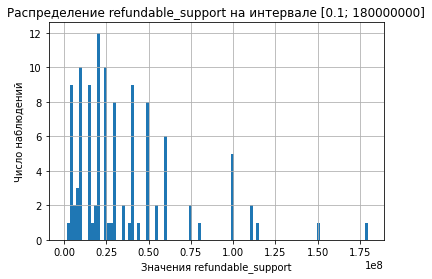

In [ ]:
plot_hist('refundable_support', xmin=0.1)

Построим диаграмму размаха.

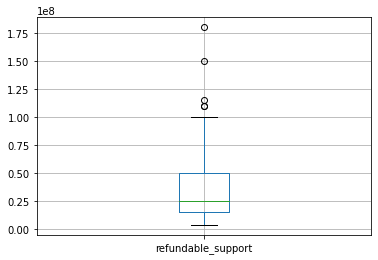

In [ ]:
movies_data_filtered[movies_data_filtered['refundable_support']>0].boxplot('refundable_support');

Есть несколько выбросов, превышающих 100 млн руб.

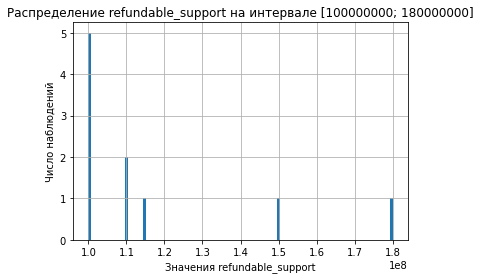

In [ ]:
plot_hist('refundable_support', xmin=100000000)

Оставим их для анализа, поскольку вполне можно допустить, что отдельные фильмы получили такую господдержку.

#### Столбец nonrefundable_support

Построим гистограмму распределения для значений, превышающих 0.

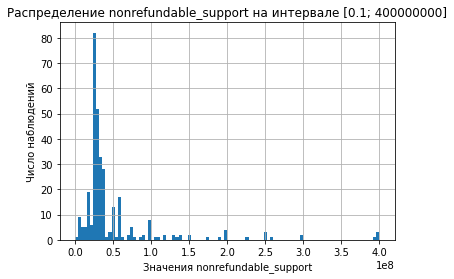

In [ ]:
plot_hist('nonrefundable_support', xmin=0.1)

Построим диаграмму размаха.

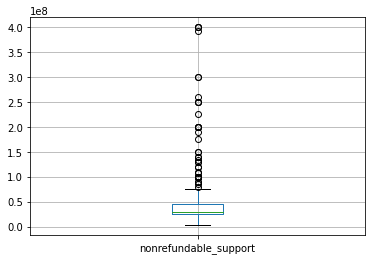

In [ ]:
movies_data_filtered[movies_data_filtered['nonrefundable_support']>0].boxplot('nonrefundable_support');

Виден ряд выбросов, превышающих 70 млн руб.

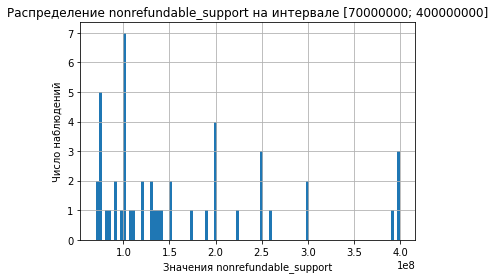

In [ ]:
plot_hist('nonrefundable_support', xmin=70000000)

Оставим их для анализа, поскольку вполне можно допустить, что отдельные фильмы получили такую господдержку.

#### Столбец budget

Построим гистограмму распределения.

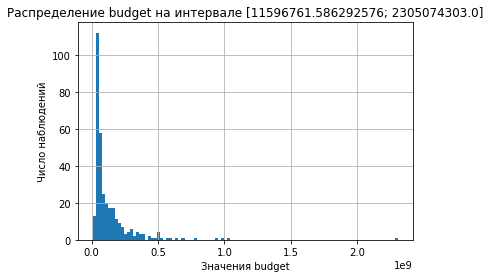

In [ ]:
plot_hist('budget')

Построим диаграмму размаха.

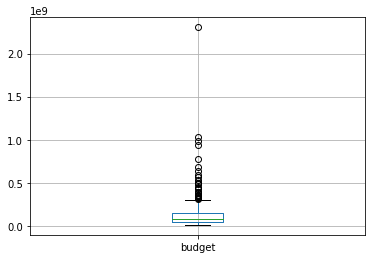

In [ ]:
movies_data_filtered.boxplot('budget');

Виден ряд выбросов, превышающих 300 млн руб.

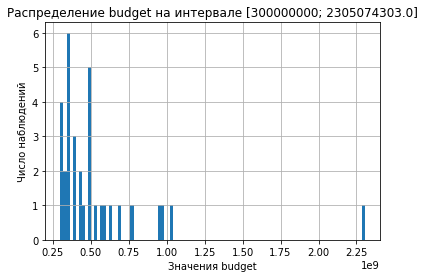

In [ ]:
plot_hist('budget', xmin=300000000)

Очевидный выброс - фильм с бюджетом более 2,25 млрд руб. Посмотрим, что это за фильм.

In [ ]:
movies_data_filtered.query('budget>2250000000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_main,genre_main,support_share
7114,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...","Россия,Китай",О.Степченко,"С.Сельянов, А.Петрухин",6+,180000000,90000000,2.305074e+09,Фонд кино,5.8,"приключения,фэнтези",3.335971e+08,2019,О.Степченко,приключения,0.117133


Информация в открытых источниках в сети Интернет подтверждает, что этот фильм действительно имел примерно такой бюджет. В связи с этим оставим его для дальнейшего анализа.

#### Столбец support_share

Построим гистограмму распределения.

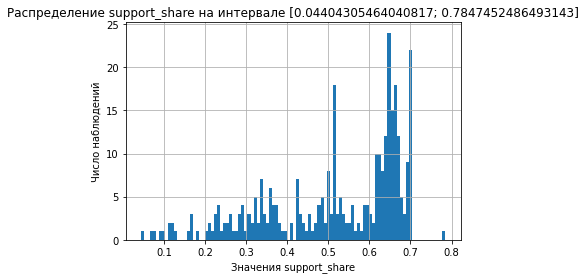

In [ ]:
plot_hist('support_share')

Построим диаграмму размаха.

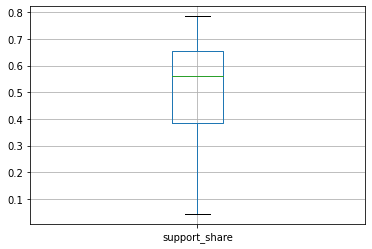

In [ ]:
movies_data_filtered.boxplot('support_share');

На диаграмме размаха выбросов не видно.

#### Столбец ratings

Построим гистограмму распределения.

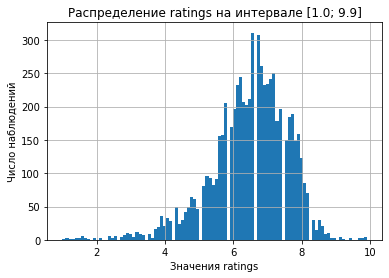

In [ ]:
plot_hist('ratings')

Построим диаграмму размаха.

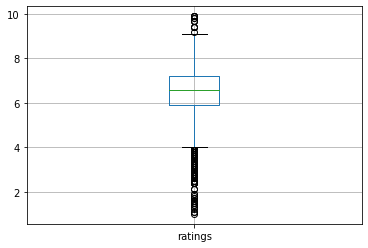

In [ ]:
movies_data_filtered.boxplot('ratings');

Виден ряд выбросов с рейтингом менее 4 и более 9.

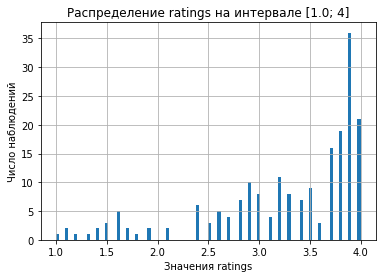

In [ ]:
plot_hist('ratings', xmax=4)

Явных аномалий не видно, хотя фильмы с рейтингом менее 2,2 достаточно редки.

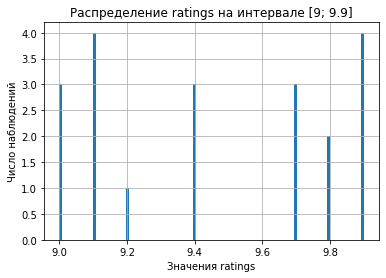

In [ ]:
plot_hist('ratings', xmin=9)

Фильмы с рейтингом 9 и более действительно редки. Посмотрим, у каких фильмов рейтинги более 9,6.

In [ ]:
movies_data_filtered.query('ratings>9.6')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_main,genre_main,support_share
259,Прошлое,221030715,2015-07-29 12:00:00+00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...","Аргентина,Бразилия",Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",16+,0,0,NaN,Частный,9.9,"ужасы,триллер,драма",NaN,2015,Эктор Бабенко,ужасы,NaN
1053,Песочный человек,121029212,2012-11-29 12:00:00+00:00,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",16+,0,0,NaN,Частный,9.7,"ужасы,фантастика,фэнтези",NaN,2012,Питер Луизи,ужасы,NaN
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00+00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,6+,0,0,NaN,Частный,9.9,"триллер,драма,детектив",NaN,2013,Е.Шиляева,триллер,NaN
1805,Спираль.,111001014,2014-01-30 12:00:00+00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,12+,0,0,NaN,Частный,9.9,"аниме,мультфильм,ужасы",4295.0,2014,А.Волгин,аниме,NaN
3585,"Машины Страшилки. Серия ""Жутчайшая повесть о п...",114003916,2016-12-09 12:00:00+00:00,Анимационный,"ООО Студия ""АНИМАККОРД"", АНИМАККОРД ЛТД.","Россия,Республика Кипр",Д.Червяцов,"Д.Ловейко, О.Кузовков",0+,0,0,NaN,Частный,9.7,"мультфильм,ужасы,фэнтези",NaN,2016,Д.Червяцов,мультфильм,NaN
3948,Круиз.,211038210,2010-09-03 12:00:00+00:00,Художественный,"ООО ""ЮНАЙТЕД МУЛЬТИМЕДИА ПРОДЖЕКТС""",Россия,И.Ромащенко,Р.Атамалибеков,16+,0,0,NaN,Частный,9.7,"приключения,комедия,фэнтези",NaN,2010,И.Ромащенко,приключения,NaN
6616,ОТ ВОЙНЫ ДО НАШИХ ДНЕЙ,111026518,2019-01-21 12:00:00+00:00,Художественный,ИП Вайсман Анатолий Александрович,Россия,"А.Сазонов,Е.Климович,А.Коломеец,С.Черникова,Е....","Д.Руюежин, Л.Пятницкая, Д.Колеров, Э.Ким, А.Хомич",12+,0,0,NaN,Частный,9.8,"фантастика,боевик",NaN,2019,А.Сазонов,фантастика,NaN
6737,Колесо времени,111003219,2019-03-01 12:00:00+00:00,Художественный,"ООО ""БестМедиа""",Россия,Б.Куломзин,Б.Куломзин,6+,0,0,NaN,Частный,9.8,"фэнтези,приключения",34992.0,2019,Б.Куломзин,фэнтези,NaN
6882,Животные рядом со Святыми,112003719,2019-05-03 12:00:00+00:00,Документальный,"ООО ""Кинопрограмма ""XXI век""",Россия,Т.Мирошник,"В.Есинов, Е.Калинина",0+,0,0,NaN,Частный,9.9,"криминал,драма",NaN,2019,Т.Мирошник,криминал,NaN


Выборочная проверки данных фильмов на Кинопоиске показывает совсем иные рейтинги. Хотя, возможно, на момент составления базы данных рейтинги были другие. Но, более того, на Кинопоиске в настоящее время нет ни одного фильма с рейтингом более 9,6. В связи с этим исключим данные фильмы из нашего дальнейшего анализа.

In [ ]:
movies_data_filtered = movies_data_filtered.query('ratings<=9.6 or ratings.isna()')

In [ ]:
movies_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7469 entries, 0 to 7485
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7469 non-null   object             
 1   puNumber               7469 non-null   int64              
 2   show_start_date        7469 non-null   datetime64[ns, UTC]
 3   type                   7469 non-null   object             
 4   film_studio            7469 non-null   object             
 5   production_country     7469 non-null   object             
 6   director               7469 non-null   object             
 7   producer               7469 non-null   object             
 8   age_restriction        7469 non-null   object             
 9   refundable_support     7469 non-null   int64              
 10  nonrefundable_support  7469 non-null   int64              
 11  budget                 332 non-null    float64          

#### Столбец box_office

Построим гистограмму распределения.

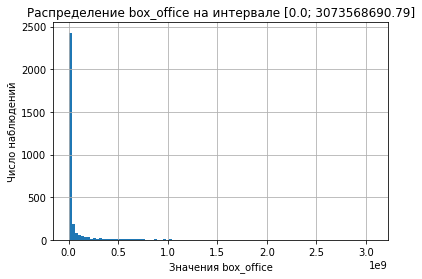

In [ ]:
plot_hist('box_office')

Рассмотрим ближе околонулевые значения - примерно до 1 млн руб.

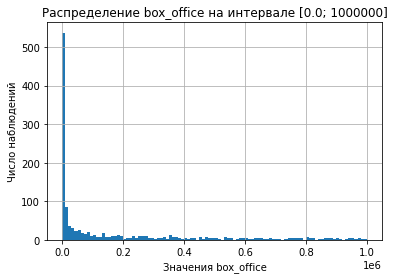

In [ ]:
plot_hist('box_office', xmax=1000000)

Рассмотрим еще ближе околонулевые значения - примерно до 200 тыс. руб.

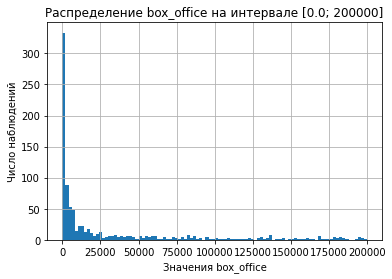

In [ ]:
plot_hist('box_office', xmax=200000)

Это очень маленькие сборы для фильма, но, возможно, фильмы на момент составления базы данных только вышли в прокат. Рассмотрим детальнее значения менее 20 тыс. руб.

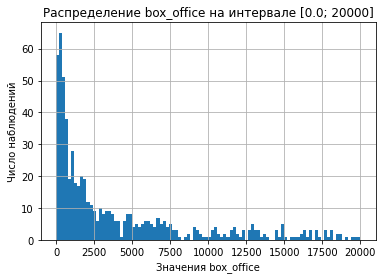

In [ ]:
plot_hist('box_office', xmax=20000)

Отдельно выделяются фильмы с нулевыми сборами - их чуть менее 60. Посмотрим, что это за фильмы.

In [ ]:
movies_data_filtered.query('box_office==0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_main,genre_main,support_share
66,Анна Павлова,111011013,2013-12-19 12:00:00+00:00,Художественный,"совместное производство Киностудия ""Мосфильм"",...","СССР,Франция,Великобритания,Куба,ГДР",Эмиль Лотяну,Не указано,6+,0,0,NaN,Частный,7.7,"драма,биография,музыка",0.0,2013,Эмиль Лотяну,драма,NaN
237,Подранки,111007613,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Губенко,Не указано,12+,0,0,NaN,Частный,8.2,драма,0.0,2013,Н.Губенко,драма,NaN
596,Запах вереска,111003012,2012-05-23 12:00:00+00:00,Художественный,"ООО ""Студия РИМ""",Россия,А.Магомедов,"М.Балашова, Е.Миронов",16+,0,0,NaN,Частный,6.3,комедия,0.0,2012,А.Магомедов,комедия,NaN
914,В тумане /По одноименной повести Василя Быкова/,121027712,2012-11-07 12:00:00+00:00,Художественный,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...","Германия,Нидерланды,Белоруссия,Россия,Латвия",Сергей Лозница,Хайно Декерт,12+,0,0,NaN,Частный,6.5,"драма,военный,история",0.0,2012,Сергей Лозница,драма,NaN
932,Письмо для Момо,124002912,2012-10-25 12:00:00+00:00,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",12+,0,0,NaN,Частный,7.4,"аниме,мультфильм,драма",0.0,2012,Окиура Хироюки,аниме,NaN
933,Летние войны,124002812,2012-10-25 12:00:00+00:00,Анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",12+,0,0,NaN,Частный,7.7,"аниме,мультфильм,фантастика",0.0,2012,Мамору Хосода,аниме,NaN
976,Гарегин Нжде,131000213,2013-04-23 12:00:00+00:00,Художественный,"Эй Джи Кей Продакшнз, Пан Армениан Медиа Групп",Армения,Грач Кешишян,Грач Кешишян,12+,0,0,NaN,Частный,7.9,биография,0.0,2013,Грач Кешишян,биография,NaN
1126,Марафон,111006712,2012-12-18 12:00:00+00:00,Художественный,"ООО ""Синема Арт Студио""",Россия,К.Оганесян,К.Оганесян,16+,0,0,NaN,Частный,5.5,"комедия,мелодрама",0.0,2012,К.Оганесян,комедия,NaN
1387,Экзамен для двоих /По роману Джин Ханфф Корелитц/,121014613,2013-06-11 12:00:00+00:00,Художественный,Депф оф Филд,США,Пол Вайц,"Пол Вайц, Керри Кохански, Эндрю Миано",12+,0,0,NaN,Частный,5.8,"мелодрама,комедия,драма",0.0,2013,Пол Вайц,мелодрама,NaN
1559,Последняя любовь мистера Моргана /По роману Фр...,121002614,2014-02-11 12:00:00+00:00,Художественный,"Камински Штим Фильм, Бавариа Пикчерз, Сенатор ...","Германия,Бельгия,США,Франция",Сандра Неттельбек,"Франк Камински, Астрид Камке, Филипп Кройцер, ...",16+,0,0,NaN,Частный,6.9,драма,0.0,2014,Сандра Неттельбек,драма,NaN


Учитывая, что годы выхода фильмов различны, нулевые сборы выглядят достаточно странно, хотя теоретически возможны (никто ни разу не пришел на фильм). Тем не менее целесообразно исключить их из нашей выборки.

In [ ]:
movies_data_filtered = movies_data_filtered.query('box_office>0 or box_office.isna()')

In [ ]:
movies_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7445 entries, 0 to 7485
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7445 non-null   object             
 1   puNumber               7445 non-null   int64              
 2   show_start_date        7445 non-null   datetime64[ns, UTC]
 3   type                   7445 non-null   object             
 4   film_studio            7445 non-null   object             
 5   production_country     7445 non-null   object             
 6   director               7445 non-null   object             
 7   producer               7445 non-null   object             
 8   age_restriction        7445 non-null   object             
 9   refundable_support     7445 non-null   int64              
 10  nonrefundable_support  7445 non-null   int64              
 11  budget                 332 non-null    float64          

Построим диаграммы размаха с выбросами и без.

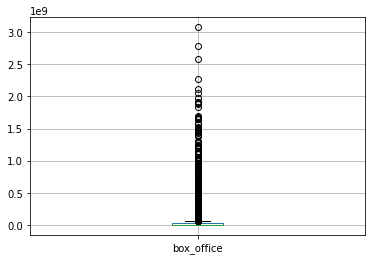

In [ ]:
movies_data_filtered.boxplot('box_office');

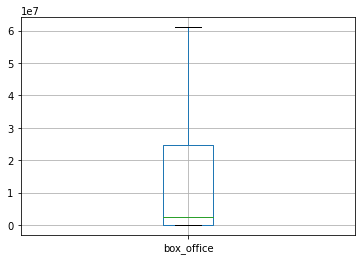

In [ ]:
movies_data_filtered.boxplot('box_office', showfliers=False);

Рассмотрим значения более 60 млн руб.

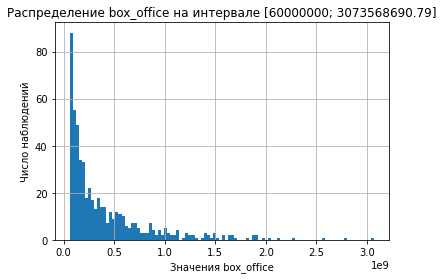

In [ ]:
plot_hist('box_office', xmin=60000000)

Рассмотрим значения более 1 млрд руб.

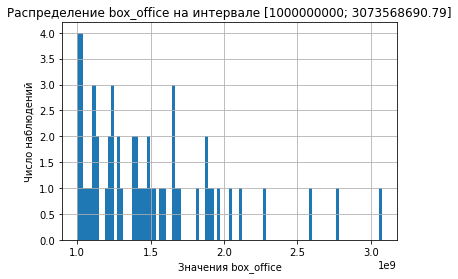

In [ ]:
plot_hist('box_office', xmin=1000000000)

Фильмы со сборами более 2 млрд рублей чрезвычайно редки. Выведем их список.

In [ ]:
movies_data_filtered.query('box_office>2000000000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_main,genre_main,support_share
2859,Зверополис,124000316,2016-02-15 12:00:00+00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Рич Мур,Байрон Ховард",Кларк Спенсер,6+,0,0,NaN,Частный,8.3,"мультфильм,комедия,криминал",2.048126e+09,2016,Рич Мур,мультфильм,NaN
3488,Пираты Карибского моря: Мертвецы не рассказыва...,121009217,2017-05-17 12:00:00+00:00,Художественный,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...",США,"Йоаким Реннинг,Эспен Сандберг",Джерри Брукхаймер,16+,0,0,NaN,Частный,6.6,"фэнтези,боевик,комедия",2.118396e+09,2017,Йоаким Реннинг,фэнтези,NaN
5653,Движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",6+,0,400000000,590192191.0,Фонд кино,7.5,"спорт,драма",2.779686e+09,2017,А.Мегердичев,спорт,0.677745
6549,Т-34,111024918,2018-12-21 12:00:00+00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",12+,60000000,120000000,563784717.0,Фонд кино,6.5,"драма,военный,боевик",2.271754e+09,2018,А.Сидоров,драма,0.319271
6820,Мстители: Финал,121005519,2019-04-29 12:00:00+00:00,Художественный,Марвел Студиос,США,"Джо Руссо,Энтони Руссо",Кевин Фейги,16+,0,0,NaN,Частный,7.6,"фантастика,боевик,драма",2.576614e+09,2019,Джо Руссо,фантастика,NaN
7456,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",12+,25000000,35000000,160000000.0,Фонд кино,6.8,комедия,3.073569e+09,2019,К.Шипенко,комедия,0.375000


Выборочная проверка на Кинопоиске подтверждает такие бюджеты, поэтому оставим их как есть.

#### Промежуточный вывод

Мы провели анализ аномалий и выбросов в количественных данных. По итогам анализа исключили фильмы с рейтингом более 9,6 (поскольку на текущее время на Кинопоиске вообще нет фильмов с таким рейтингом), а также фильмы со сборами, равными нулю (т.к. маловероятно, что никто ни разу не пришел на фильм).

##  Исследовательский анализ данных

### Анализ динамики проката по годам

Создадим сводную таблицу по годам со следующими столбцами: число фильмов, число фильмов с указанной суммой сборов, общая, средняя и медианная сумма сборов (с округлением до целого), а также добавим столбец с долей фильмов с указанной суммой сборов.

In [ ]:
movies_data_pivot = movies_data_filtered.pivot_table(index='show_start_year', values='box_office', \
                                                     aggfunc=[len, 'count', 'sum', 'mean', 'median'])
movies_data_pivot.insert(2, 'share', movies_data_pivot['count']/movies_data_pivot['len']*100)
movies_data_pivot = movies_data_pivot.astype(int)
movies_data_pivot.columns = ['Число фильмов', 'В т.ч. с указанной суммой сборов', 'Доля фильмов с указанной суммой сборов, %', \
                             'Общие сборы, руб.', 'Средние сборы, руб.', 'Медианные сборы, руб.']

In [ ]:
movies_data_pivot

,Число фильмов,В т.ч. с указанной суммой сборов,"Доля фильмов с указанной суммой сборов, %","Общие сборы, руб.","Средние сборы, руб.","Медианные сборы, руб."
show_start_year,,,,,,
2010,979,101,10,2428654,24046,1710
2011,622,109,17,14102765,129383,3000
2012,587,123,20,6955423,56548,6220
2013,623,179,28,29799706,166478,3580
2014,799,272,34,7444947564,27371130,21445
2015,699,461,65,39497365196,85677581,5034342
2016,815,525,64,47866299741,91173904,3915041
2017,505,357,70,48563707217,136032793,9968340
2018,889,475,53,49668403134,104565059,8891102


#### Динамика числа фильмов

Построим диаграмму.

In [ ]:
def plot_bar(names):
    if len(names)>1:
        legend = True
        suffix = 'ей'
    else:
        legend = False
        suffix = 'я'
    movies_data_pivot[names].plot(kind='bar', legend=legend)
    plt.title('Динамика показател' + suffix + ': ' + str('; '.join(names)), y=1.1)
    plt.ylabel('Значение')
    plt.xlabel('Годы')
    plt.show()

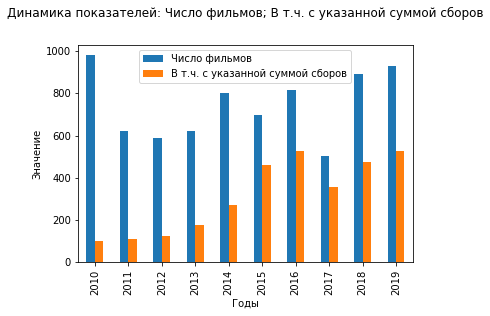

In [ ]:
plot_bar(['Число фильмов', 'В т.ч. с указанной суммой сборов'])

Мы видим, что наибольшее число фильмов вышло в 2010 году. При этом в том же году мы наблюдаем минимальное значение числа фильмов с указанной суммой сборов. Видимо, сбор статистики тогда еще не был отлажен. Затем число фильмов снижается, но в 2014--2016 возрастает, после чего наблюдается резкое падение в 2017 году. Возможно это связано с тем, что в 2017 году изменились правила выдачи прокатных удостоверений.

Число фильмов с указанной суммой сборов также растет до 2016 года и падает в 2017 году. В 2018-2019 годах по обоим показателям отмечается рост.

Построим график доли фильмов с указанной суммой сборов.

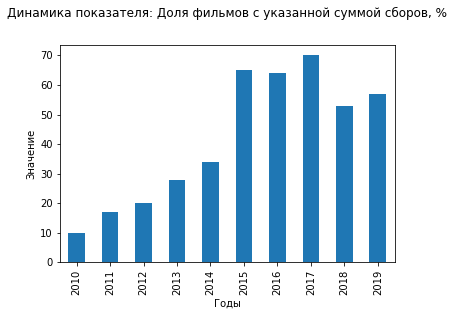

In [ ]:
plot_bar(['Доля фильмов с указанной суммой сборов, %'])

Наибольшая доля фильмов с указанной суммой сборов наблюдается в 2017 году - 70%. Если говорить о периоде, то это период 2015-2017 годов, в которые она превышала 60%.

#### Динамика сборов

Построим диаграмму.

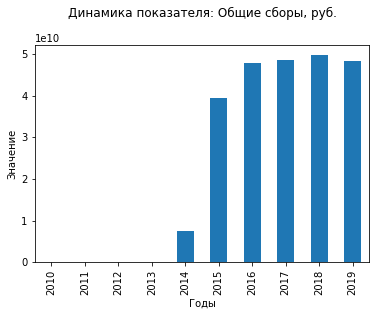

In [ ]:
plot_bar(['Общие сборы, руб.'])

До 2014 года общие сборы практически незаметны - это, по всей видимости, связано с низкой долей фильмов с информацией о сборах.
Минимальные сборы были в 2010 году - всего 2,4 млн руб. Максимальные - в 2018 - почти 50 млрд руб.

Отдельно рассмотрим среднюю и медианную сумму сборов

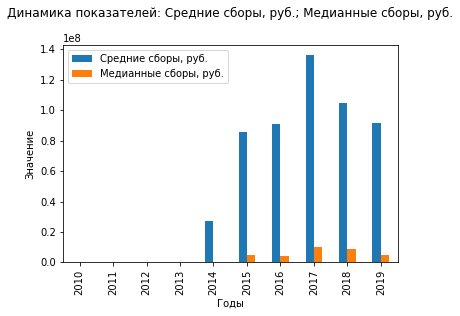

In [ ]:
plot_bar(['Средние сборы, руб.', 'Медианные сборы, руб.'])

Максимальные средние (и медианные) сборы отмечаются в 2017 году, что может быть связано с изменением правил выдачи прокатных удостоверений. При этом на всем анализируемом периоде медианные сборы существенно ниже средних, что говорит о том, что в каждом году несколько (немного) фильмов собирали очень большую кассу, тогда как другие фильмы (и их большинство) - значительно меньшую.

#### Промежуточный вывод

Мы провели анализ динамики проката по годам. По результатам анализа установлено, что до 2014 года наблюдалась достаточно низкая доля фильмов с информацией о сборах. Число фильмов росло до 2016 года, после чего в 2017 году было резкое снижение (возможно, из-за изменения правил выдачи прокатных удостоверений), затем рост возобновился. При этом начиная с 2016 года общая сумма сборов в прокате стала превышать 47 млрд руб., а максимума достигла в 2018 году (почти 50 млрд руб.). Медианные сборы в каждом году существенно ниже средних, что говорит о наличии небольшого числа фильмов с очень большими сборами.

### Анализ взаимосвязи возрастного рейтинга и сборов

Создадим сводную таблицу по годам со столбцами, соответствующими рейтингам фильма, в качестве значений - общие и медианные сборы, а также число фильмов.

In [ ]:
movies_data_pivot_age = movies_data_filtered.pivot_table(index='show_start_year', values='box_office', \
                        columns='age_restriction', aggfunc=['sum', 'median', 'count'], margins=True)

In [ ]:
movies_data_pivot_age

sum                                            \
age_restriction            0+            6+           12+           16+   
show_start_year                                                           
2010             1.887611e+06           NaN  1.201460e+05  3.665120e+05   
2011             1.349987e+07  4.500000e+02  2.198910e+05  3.815130e+05   
2012             2.266483e+06  1.143410e+06  1.087340e+05  3.254216e+06   
2013             2.710302e+06  3.597520e+05  2.091034e+07  6.580696e+05   
2014             3.755623e+08  1.730614e+09  2.584778e+09  5.442801e+08   
2015             3.790546e+08  8.701799e+09  1.361608e+10  1.136812e+10   
2016             1.502288e+08  1.205315e+10  1.220445e+10  1.666455e+10   
2017             2.295989e+08  1.208614e+10  7.851428e+09  1.874504e+10   
2018             3.244900e+07  1.010497e+10  1.426729e+10  1.650360e+10   
2019             1.774607e+07  1.285251e+10  1.268020e+10  1.275342e+10   
All              1.205004e+09  5.753069e+10  6.322558e+10  7.658367e+10   

                                                  median                \
age_restriction           18+           All           0+            6+   
show_start_year                                                          
2010             5.438500e+04  2.428654e+06      6052.50           NaN   
2011             1.040000e+03  1.410276e+07      7010.00  4.500000e+02   
2012             1.825800e+05  6.955423e+06     18067.50  6.475000e+03   
2013             5.161246e+06  2.979971e+07     13225.00  3.545000e+03   
2014             2.209713e+09  7.444948e+09    190855.00  1.376850e+05   
2015             5.432308e+09  3.949737e+10   2956298.40  2.038098e+07   
2016             6.793930e+09  4.786630e+10   2571294.10  3.026256e+06   
2017             9.651496e+09  4.856371e+10  22178956.00  5.199210e+07   
2018             8.760086e+09  4.966840e+10   3616937.28  1.468885e+07   
2019             1.012180e+10  4.842567e+10   3885434.50  1.419961e+07   
All              4.297473e+10  2.415197e+11     80455.00  6.152598e+06   

                                                                    count  \
age_restriction          12+          16+          18+         All     0+   
show_start_year                                                             
2010                 2650.00     1235.000      915.000     1710.00   22.0   
2011                 3741.50     2835.000      520.000     3000.00   30.0   
2012                 6775.00     1920.000     1385.000     6220.00   30.0   
2013                 2700.00     3590.000     1775.000     3580.00   37.0   
2014                 6962.50    15035.000   180108.000    21445.00   38.0   
2015             15959668.30  4784781.500  4616614.700  5034342.40   37.0   
2016              4690635.25  5180850.500  6107001.740  3915041.02   41.0   
2017              9010548.00  9702077.000  8212677.000  9968340.00    3.0   
2018              8931965.66  9010638.625  7179466.000  8891102.21    5.0   
2019              3405545.76  3210717.810  5603216.550  4654563.09    3.0   
All                873373.00  1773753.000  5107818.355  2414891.00  246.0   

                                                    
age_restriction     6+    12+     16+    18+   All  
show_start_year                                     
2010               NaN   17.0    54.0    8.0   101  
2011               1.0   22.0    54.0    2.0   109  
2012              16.0   13.0    47.0   17.0   123  
2013              25.0   57.0    44.0   16.0   179  
2014              29.0   80.0    80.0   45.0   272  
2015              53.0   72.0   167.0  132.0   461  
2016              70.0   82.0   181.0  151.0   525  
2017              45.0   41.0   121.0  147.0   357  
2018              68.0   67.0   156.0  179.0   475  
2019              80.0   85.0   178.0  183.0   529  
All              387.0  536.0  1082.0  880.0  3131

Суммарно за все периоды наибольшие общие сборы - у фильмов с рейтингом "16+", наименьшие - с рейтингом "0+". Наибольшие медианные сборы - у фильмов с рейтингом "6+", наименьшие - с рейтингом "0+"

Построим графики общих и медианных сборов.

In [ ]:
def plot_line(col_type, xmin=2010, xmax=2019):
    if col_type=='median':
        column = 'median'
        type_word = 'медианных'
    else:
        column = 'sum'
        type_word = 'общих'
    movies_data_pivot_age[column].drop(['All'], axis=1).loc[xmin:xmax].plot(kind='line', xticks=range(xmin, xmax+1))
    plt.title('Динамика '+ type_word + ' сборов по возрастным ограничениям', y=1.1)
    plt.ylabel('Сумма, руб.')
    plt.xlabel('Годы')
    plt.show()

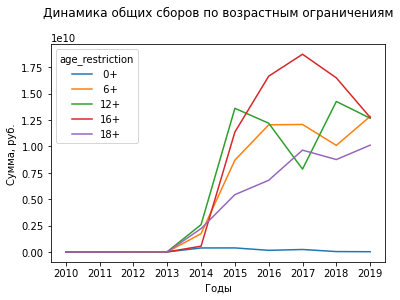

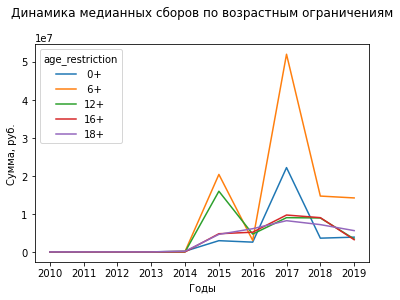

In [ ]:
plot_line('sum')
plot_line('median')

Отдельно рассмотрим период с 2015 по 2019 годы.

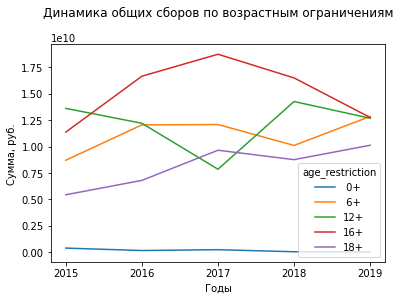

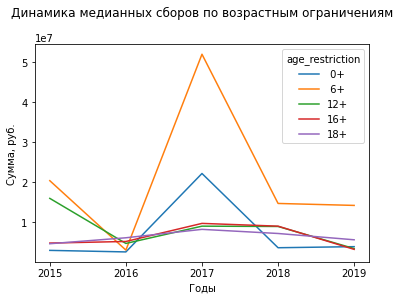

In [ ]:
plot_line('sum', xmin=2015)
plot_line('median', xmin=2015)

**Промежуточный вывод**

Мы видим, что в 2015-2019 годах (кроме 2015 и 2019 года) фильмы с рейтингом "16+" имели максимальные общие сборы. Фильмы с рейтингом "0+" на протяжении всего анализируемого периода имели минимальные суммарные сборы.
Если рассматривать медианные сборы, то практически всегда (кроме 2016 года) максимальные медианные сборы имели фильмы с рейтингом "6+". Минимальные - с рейтингом "0+", за исключением 2017 и 2019 годов. В 2017 году фильмы с рейтингом "0+" вышли на второе место после "6+" по медианным сбором.

Вместе с тем в 2017-2019 годах фильмов с рейтингом "0+" выходило очень мало - не более 5, поэтому данные за эти периоды могут быть нерепрезентативными.

### Изучение фильмов, получивших господдержку

Сделаем выборку фильмов, получивших господдержку (как мы помним, это фильмы, у которых указан бюджет).

In [ ]:
movies_data_support = movies_data_filtered.query('budget>0').copy()

In [ ]:
movies_data_support.shape[0]

332

Таких фильмов всего 332.

Добавим новые столбцы с общим объемом поддержки, долей возвратной поддержки, "отдачей поддержки" (отношение сборов к объему господдержки), "отдачей бюджета" (отношение сборов к бюджету).

In [ ]:
movies_data_support['support_total'] = movies_data_support['refundable_support'] + movies_data_support['nonrefundable_support']
movies_data_support['refundable_support_share'] = movies_data_support['refundable_support'] / \
                                                  movies_data_support['support_total'] * 100
movies_data_support['support_return'] = movies_data_support['box_office'] / movies_data_support['support_total']
movies_data_support['budget_return'] = movies_data_support['box_office'] / movies_data_support['budget']

In [ ]:
movies_data_support.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_year,support_share,support_total,refundable_support_share,support_return,budget_return
count,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02,316.000000,3.180000e+02,332.000000,332.000000,3.320000e+02,332.000000,318.000000,318.000000
mean,1.115938e+08,1.186446e+07,4.898099e+07,1.353333e+08,6.020886,1.324324e+08,2016.719880,0.517386,6.084545e+07,14.060504,1.877601,0.775960
std,5.703031e+06,2.491656e+07,5.998012e+07,1.883440e+08,1.148943,3.348379e+08,1.640637,0.165619,7.275546e+07,24.251655,4.317110,1.638950
min,1.110001e+08,0.000000e+00,0.000000e+00,1.159676e+07,1.000000,1.550000e+03,2013.000000,0.044043,3.000000e+06,0.000000,0.000044,0.000017
25%,1.110049e+08,0.000000e+00,2.500000e+07,4.615397e+07,5.300000,1.236676e+06,2015.000000,0.384615,2.533375e+07,0.000000,0.040562,0.023030
50%,1.110104e+08,0.000000e+00,3.000000e+07,7.500007e+07,6.200000,1.572007e+07,2017.000000,0.562522,3.500000e+07,0.000000,0.439611,0.176420
75%,1.110178e+08,1.500000e+07,4.037500e+07,1.511720e+08,6.700000,1.063730e+08,2018.000000,0.654613,6.000000e+07,26.111111,1.715664,0.857705
max,2.140101e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.400000,3.073569e+09,2019.000000,0.784745,5.000000e+08,100.000000,51.226145,19.209804


Мы видим, что объем господдержки изменяется от 3 млн руб. до 500 млн руб. при медианном значении 35 млн руб.

#### Динамика объемов господдержки

Рассмотрим, как изменяется объем господдержки и ее структура по годам. Для этого создадим сводную таблицу.

In [ ]:
movies_data_support_pivot = movies_data_support.pivot_table(index='show_start_year', \
                            values=['support_total', 'refundable_support_share'], \
                            aggfunc={'support_total': ['sum', 'mean', 'count'], 'refundable_support_share': 'mean'})

In [ ]:
movies_data_support_pivot

refundable_support_share support_total                \
                                    mean         count          mean   
show_start_year                                                        
2013                            0.000000           2.0  6.717397e+07   
2014                           10.267857          16.0  3.575014e+07   
2015                           14.689975          86.0  4.251444e+07   
2016                           14.614146          61.0  7.054353e+07   
2017                           19.865013          41.0  7.765785e+07   
2018                           13.268773          56.0  6.155303e+07   
2019                           11.306915          70.0  7.005714e+07   

                               
                          sum  
show_start_year                
2013             1.343479e+08  
2014             5.720023e+08  
2015             3.656241e+09  
2016             4.303155e+09  
2017             3.183972e+09  
2018             3.446969e+09  
2019             4.904000e+09

Построим диаграммы для суммы господдержки и доли возвратной господдержки.

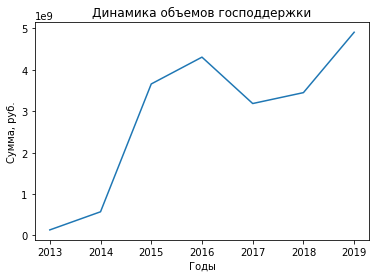

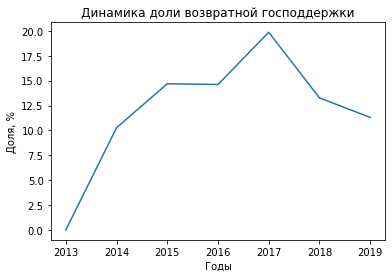

In [ ]:
movies_data_support_pivot['support_total']['sum'].plot(kind='line')
plt.title('Динамика объемов господдержки')
plt.ylabel('Сумма, руб.')
plt.xlabel('Годы')
plt.show()

movies_data_support_pivot['refundable_support_share']['mean'].plot(kind='line')
plt.title('Динамика доли возвратной господдержки')
plt.ylabel('Доля, %')
plt.xlabel('Годы')
plt.show()

Объем господдержки имеет тенденцию к росту. При этом в 2017 году произошло снижение, после чего рост возобновился.
При этом тот же 2017 год стал переломным для динамики доли возвратной господдержки: до этого года она росла, а после начала снижаться.

#### Динамика структуры господдержки по источникам

Рассмотрим, как изменяется структура господдержки в разрезе источников по годам. Для этого создадим сводную таблицу.

In [ ]:
movies_data_support_source_pivot = movies_data_support.pivot_table(index='financing_source', columns='show_start_year',\
                                   values='support_total', aggfunc='sum', margins=True).drop('All').\
                                   apply(lambda x: x/x.sum()*100).T

In [ ]:
movies_data_support_source_pivot

financing_source,Министерство культуры,"Министерство культуры, Фонд кино",Фонд кино
show_start_year,,,
2013,19.724902,NaN,80.275098
2014,36.975376,27.884905,35.139719
2015,30.107694,8.735259,61.157046
2016,17.425608,10.903626,71.670766
2017,11.023967,2.020963,86.955070
2018,26.864178,1.595605,71.540218
2019,29.995922,2.406199,67.597879
All,23.943050,5.868272,70.188677


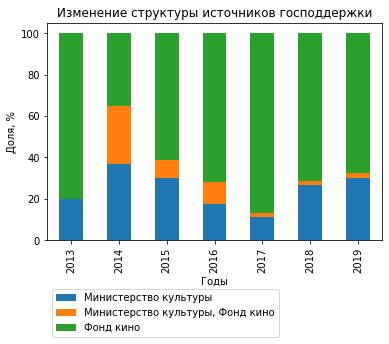

In [ ]:
movies_data_support_source_pivot.drop('All').plot(kind='bar', stacked=True)
plt.title('Изменение структуры источников господдержки')
plt.ylabel('Доля, %')
plt.xlabel('Годы')
plt.legend(bbox_to_anchor=(0,-0.2), loc='upper left')
plt.show()

Мы видим, что основной объем господдержки (в среднем 70%) идет через Фонд кино. При этом в 2014 году его доля резко сократилась, затем снова начала расти и достигла максимума в 2017 году, после чего стала сокращаться.

#### Эффективность господдержки по годам

Рассмотрим динамику эффективности господдержки по годам. Для этого создадим сводную таблицу.

In [ ]:
movies_data_efficiency_year = movies_data_support.pivot_table(index='show_start_year', \
                              values=['support_return', 'budget_return', 'ratings'], aggfunc='mean', margins=True)
movies_data_efficiency_year = movies_data_efficiency_year[['support_return', 'budget_return', 'ratings']]
movies_data_efficiency_year.columns = ['Отдача по господдержке', 'Отдача по бюджету', 'Рейтинг']
movies_data_efficiency_year

,Отдача по господдержке,Отдача по бюджету,Рейтинг
show_start_year,,,
2013,0.099417,0.058989,6.700000
2014,1.563709,0.600714,6.006667
2015,1.354060,0.536174,6.139759
2016,1.278799,0.635216,5.677193
2017,3.062531,1.003052,6.000000
2018,2.370559,1.106971,6.001887
2019,2.130765,0.870481,6.176119
All,1.911457,0.780429,6.020462


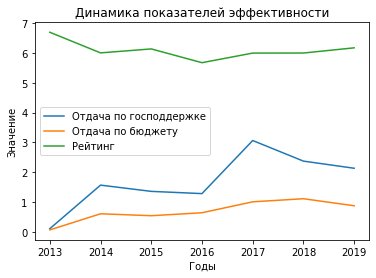

In [ ]:
movies_data_efficiency_year.drop('All', axis=0).plot(kind='line')
plt.title('Динамика показателей эффективности')
plt.ylabel('Значение')
plt.xlabel('Годы')
plt.show()

Мы видим, что максимальная отдача по господдержке наблюдалась в 2017 году - она составила примерно 3. Т.е. на каждый вложенный из бюджета рубль сборы составили 3 рубля. Затем эта отдача пошла на спад.

Что касается отдачи по бюджету, то на практически на всем анализируемом периоде (кроме 2017-2018 годов) она в среднем была ниже 1, т.е. на рубль затрат приходилось меньше рубля сборов. Иными словами, фильмы с господдержкой практически не окупаются.

Рейтинг находится примерно на одном уровне с небольшой тенденцией к снижению. Средний рейтинг фильмов с господдержкой невелик - лишь немногим более 6.

Посмотрим, как менялась доля окупившихся фильмов по годам (т.е. доля фильмов с budget_return > 1).

In [ ]:
movies_data_budget_rentability_pivot = movies_data_support.pivot_table(index='show_start_year', values='budget_return', \
                                       aggfunc=lambda x: sum(x>1)/x.count()*100, margins=True)
movies_data_budget_rentability_pivot.columns = ['Доля окупившихся фильмов, %']
movies_data_budget_rentability_pivot

,"Доля окупившихся фильмов, %"
show_start_year,
2013,0.000000
2014,18.750000
2015,20.000000
2016,18.333333
2017,33.333333
2018,32.142857
2019,18.333333
All,22.955975


Доля окупившихся фильмов в разные годы не превышает 1/3, а в среднем составляет менее 1/4.

#### Эффективность господдержки по жанрам

Рассмотрим эффективность господдержки по жанрам. Для этого создадим сводную таблицу.

In [ ]:
movies_data_efficiency_genre = movies_data_support.pivot_table(index='genre_main', \
                              values=['support_return', 'budget_return', 'ratings'], aggfunc='mean', margins=True)
movies_data_efficiency_genre = movies_data_efficiency_genre[['support_return', 'budget_return', 'ratings']]
movies_data_efficiency_genre.columns = ['Отдача по господдержке', 'Отдача по бюджету', 'Рейтинг']
movies_data_efficiency_genre

,Отдача по господдержке,Отдача по бюджету,Рейтинг
genre_main,,,
Не указано,1.193713,0.685697,NaN
биография,5.515600,1.136724,6.900000
боевик,2.293792,0.706075,6.583333
военный,2.750346,0.857312,6.466667
детектив,0.318218,0.071361,6.760000
детский,0.032442,0.021660,7.125000
драма,1.021762,0.441319,6.419355
история,1.103749,0.561304,5.350000
комедия,3.312854,1.474036,5.514865


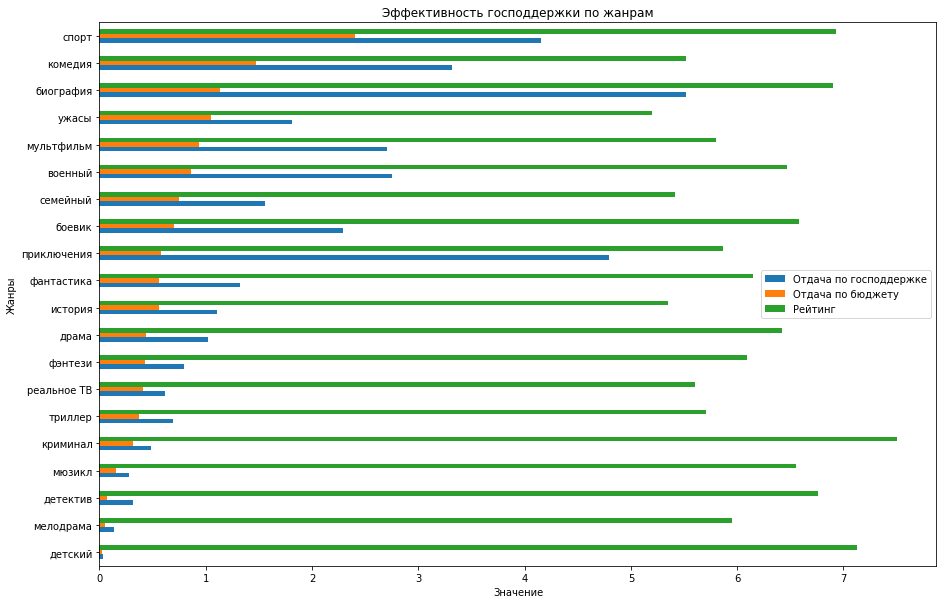

In [ ]:
movies_data_efficiency_genre.drop(['All', 'Не указано'], axis=0).sort_values('Отдача по бюджету').plot(kind='barh', figsize=(15, 10))
plt.title('Эффективность господдержки по жанрам')
plt.ylabel('Жанры')
plt.xlabel('Значение')
plt.show()

Мы видим, что самая большая отдача по бюджету - у фильмов с жанрами "спорт", "комедия", "биография", самая низкая - у фильмов с жанрами "детский", "мелодрама", "детектив". Если оценивать отдачу по господдержке, то самая большая наблюдается у фильмов с жанрами "биография", "приключения" и "спорт". Наибольшие рейтинги у жанров "криминал", "детский" и "спорт". Таким образом, жанр "спорт" по всем троим показателям входит в число лидеров.

#### Эффективность господдержки по режиссерами

Рассмотрим эффективность господдержки по режиссерам. Для этого создадим сводную таблицу.

In [ ]:
movies_data_efficiency_director = movies_data_support.pivot_table(index='director_main', \
                              values=['support_return', 'budget_return', 'ratings'], aggfunc='mean')
movies_data_efficiency_director = movies_data_efficiency_director[['support_return', 'budget_return', 'ratings']]
movies_data_efficiency_director.columns = ['Отдача по господдержке', 'Отдача по бюджету', 'Рейтинг']
movies_data_efficiency_director.sort_values('Отдача по господдержке', ascending=False).head(10)

,Отдача по господдержке,Отдача по бюджету,Рейтинг
director_main,,,
А.Черномазов (псевдоним Алексей Нужный),21.115409,7.227251,6.900000
К.Шипенко,18.209274,6.921344,6.833333
О.Трофим,17.008609,9.729984,NaN
К.Феоктистов,15.184535,4.351758,5.500000
М.Бальчюнас,13.111488,5.081857,6.000000
А.Сидоров,12.620856,4.029471,6.500000
А.Богуславский,11.869004,0.803041,5.200000
М.Бальчюнас (псевдоним Марюс Вайсберг),10.994409,4.334322,5.300000
А.Першин (псевдоним Ж.Крыжовников),10.841731,5.229157,4.700000


In [ ]:
movies_data_efficiency_director.sort_values('Отдача по бюджету', ascending=False).head(10)

,Отдача по господдержке,Отдача по бюджету,Рейтинг
director_main,,,
О.Трофим,17.008609,9.729984,NaN
А.Черномазов (псевдоним Алексей Нужный),21.115409,7.227251,6.900000
К.Шипенко,18.209274,6.921344,6.833333
А.Першин (псевдоним Ж.Крыжовников),10.841731,5.229157,4.700000
М.Бальчюнас,13.111488,5.081857,6.000000
А.Мегердичев,6.949215,4.709798,7.500000
К.Феоктистов,15.184535,4.351758,5.500000
М.Бальчюнас (псевдоним Марюс Вайсберг),10.994409,4.334322,5.300000
А.Сидоров,12.620856,4.029471,6.500000


In [ ]:
movies_data_efficiency_director.sort_values('Рейтинг', ascending=False).head(10)

,Отдача по господдержке,Отдача по бюджету,Рейтинг
director_main,,,
Ю.Кара,0.033475,0.008369,9.4
Н.Степанова при участии С.Иванова,0.170504,0.055410,9.0
А.Атанесян,0.013787,0.004601,8.1
А.Попова,NaN,NaN,8.0
К.Оганисян,1.440595,0.691485,7.9
В.Татарский,0.000918,0.000326,7.8
А.Андрианов,2.457155,1.271297,7.8
И.Шахназаров,0.011905,0.007945,7.8
А.Игудин,0.011161,0.007342,7.7


Мы получили список 10 режиссеров, фильмы которых имеют наибольшую отдачу по господдержке, и 10 режиссеров, фильмы которых имеют наибольшую отдачу по бюджету. Эти два списка во многом пересекаются. А вот режиссеры с высокими рейтингами совершенно другие (что ставит под сомнение объективность рейтингов).

Посчитаем долю режиссеров, которые снимают окупающиеся (в среднем) фильмы.

In [ ]:
(movies_data_efficiency_director['Отдача по бюджету']>1).mean()*100

20.37037037037037

Можно сказать, что лишь пятая часть режиссеров снимает окупающиеся фильмы.

#### Взаимосвязь финансовых показателей и показателей результативности фильмов

Рассмотрим взаимосвязь финансовых показателей (бюджет и объем господдержки) и показателей результативности фильмов (рейтинг и сборы).

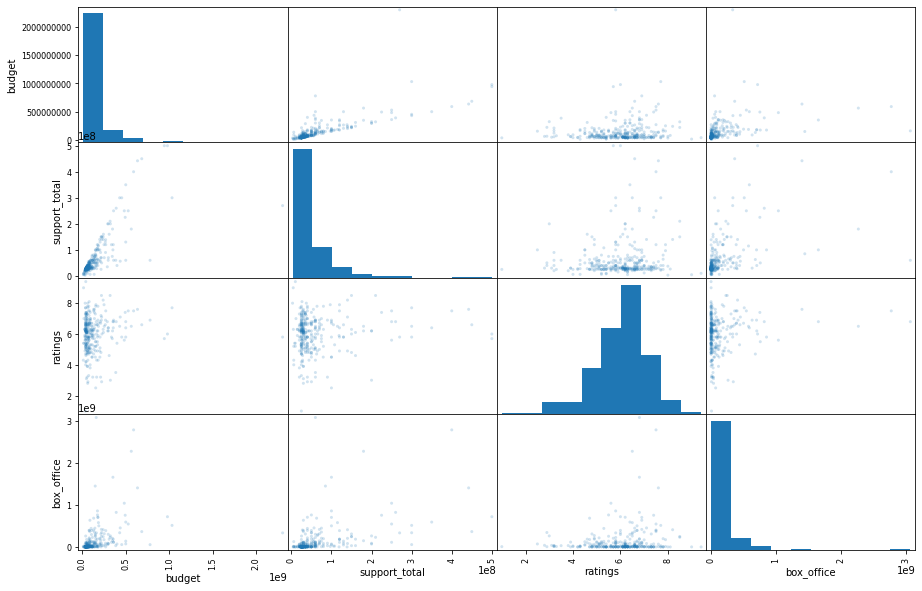

In [ ]:
pd.plotting.scatter_matrix(movies_data_support[['budget', 'support_total', 'ratings', 'box_office']], alpha=0.2, figsize=(15,10));

Видна взаимосвязь бюджета и объема господдержки, что достаточно логично. Про взаимосвязь бюджета и объемов господдержки с рейтингами и сборами исходя из графиков нельзя сделать однозначных выводов (выглядит так, будто взаимосвязь отсутствует).

Рассмотрим взаимосвязи отдельных показателей.

In [ ]:
def plot_scatter(x, y, xmax=0, ymax=0):
    if xmax == 0:
        xmax = movies_data_support[x].max()
    if ymax == 0:
        ymax = movies_data_support[y].max()

    movies_data_support.plot(x=x, y=y, kind='scatter', xlim=(0, xmax), ylim=(0, ymax), alpha=0.2);
    plt.title('Взаимосвязь '+ x + ' и ' + y, y=1.1)
    plt.show()

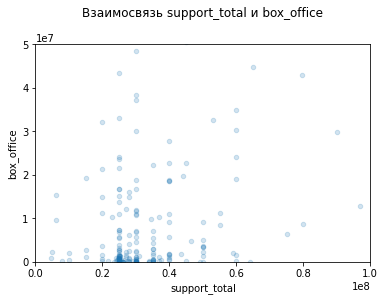

In [ ]:
plot_scatter(x='support_total', y='box_office', xmax=100000000, ymax=50000000)

Возможно, есть слабая прямая взаимосвязь между объемом господдержки и сборами.

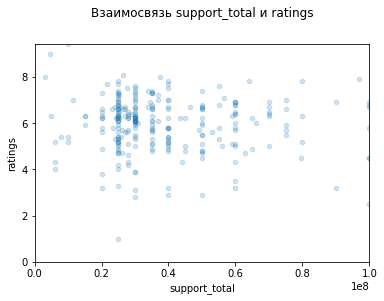

In [ ]:
plot_scatter(x='support_total', y='ratings', xmax=100000000)

Взаимосвязь между объемом господдержки и рейтингами не прослеживается.

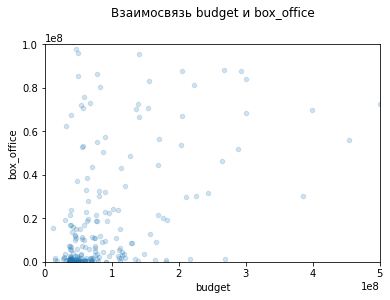

In [ ]:
plot_scatter(x='budget', y='box_office', xmax=500000000, ymax=100000000)

Возможно, есть слабая прямая взаимосвязь между бюджетом и сборами.

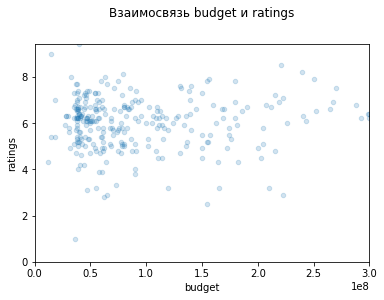

In [ ]:
plot_scatter(x='budget', y='ratings', xmax=300000000)

Взаимосвязь между бюджетом и рейтингами не прослеживается.

Проведем анализ взаимосвязи факта окупаемости фильма и рейтинга. Для этого добавим новый столбец.

In [ ]:
movies_data_support['payback'] = (movies_data_support['budget_return'] >= 1)

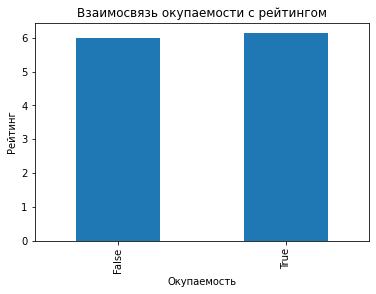

In [ ]:
movies_data_support.groupby('payback').mean()['ratings'].plot(kind='bar')
plt.title('Взаимосвязь окупаемости с рейтингом')
plt.ylabel('Рейтинг')
plt.xlabel('Окупаемость')
plt.show()

Окупаемость фильма практически не связана с рейтингом.

Для подтверждения гипотез построим матрицу корреляций.

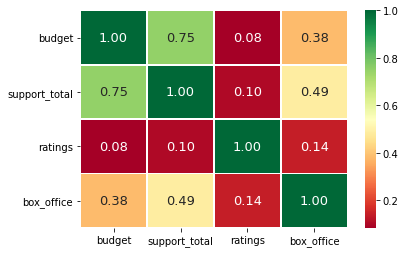

In [ ]:
sns.heatmap(movies_data_support[['budget', 'support_total', 'ratings', 'box_office']].corr(), \
            annot=True, annot_kws={'size':13}, fmt=".2f", linewidth=.5, cmap='RdYlGn');

Действительно, между сборами и общим объемом господдержки, а также между сборами и бюджетом есть очень слабая прямая взаимосвязь (коэффициенты корреляции 0,49 и 0,38 соответственно).

#### Промежуточный вывод

Мы провели анализ фильмов, получивших господдержку. По результатам анализа можно сделать следующие выводы:
- объем господдержки имеет тенденцию к росту с провалом в 2017 году;
- основной объем господдержки (более 2/3) идет через Фонд кино;
- средняя результативность фильмов с господдержкой достаточно низка: только один из четырех таких фильмов окупает свой бюджет в прокате, а средний рейтинг лишь немного превышает 6;
- наиболее "результативным" жанром является "спорт": он входит в число лидеров как по отдаче на бюджет, так и рейтингам;
- лишь пятая часть режиссеров снимает окупающиеся фильмы;
- окупаемость фильма не связана с его рейтингами;
- между сборами и общим объемом господдержки, а также между сборами и бюджетом есть очень слабая прямая взаимосвязь.

## Общий вывод

Мы провели исследование данных о российском кинопрокате с целью выявить факторы, влияющие на интерес зрителей к фильмам.
В рамках исследования мы осуществили выгрузку и предобработку данных, затем рассчитали производные показатели и провели исследовательский анализ данных.

В ходе предобработки данных мы:
- объединили две таблицы данных - по прокату и по сборам;
- выявили пропуски в ряде столбцов, там, где это было возможно, заполнили их подходящими значениями, там, где таких значений найти не удалось, мы оставили пропуски, чтобы не терять данные;
- изменили типы данных;
- выявили и устранили неявные дубликаты, в том числе связанные с лишними пробелами, опечатками и различными наименованиями одних и тех же объектов;
- выявили и устранили аномальные записи с нереалистично высокими рейтингами и суммой сборов, равной нулю.

Мы рассчитали производные показатели, необходимые для дальнейшего анализа:
- год проката;
- имя и фамилия основного режиссера;
- основной жанр;
- доля господдержки в бюджете.

В ходе исследовательского анализа мы установили следующие общие закономерности:
- до 2014 года наблюдалась достаточно низкая доля фильмов с информацией о сборах, возможно, из-за недостаточно эффективной работы системы сбора статистики;
- начиная с 2016 года общая сумма сборов в прокате стала превышать 47 млрд руб., а максимума достигла в 2018 году (почти 50 млрд руб.);
- практически всегда (кроме 2016 года) максимальные медианные сборы имели фильмы с рейтингом "6+", минимальные - с рейтингом "0+".

Также мы отдельно изучили фильмы с господдержкой для которых выявили следующие закономерности:
- средняя результативность фильмов с господдержкой достаточно низка как по доле окупившихся фильмов (25%), так и по среднему рейтингу (6);
- наибольший интерес (как в виде сборов, так и в виде рейтингов) у зрителей вызывают фильмы с жанром "спорт";
- лишь небольшая часть режиссеров снимает окупающиеся фильмы (список топ-10 режиссеров приведен выше);
- бюджет и объем господдержки незначительно (положительно) влияют на объем сборов.

Рекомендации заказчику:
- Учесть выявленные закономерности в рамках развития системы господдержки отечественного кино. В частности, рассмотреть возможность увязки объемов господдержки с результатами предыдущих работ режиссера (например, при большой доле фильмов, провалившихся в прокате, снижать долю господдержки). Также возможно установление нелинейной зависимости объемов господдержки от бюджета фильма (с ростом бюджета доля должна убывать):
т.к. бюджет лишь незначительно влияет на объем сборов, лучше поддержать 10 фильмов с небольшим бюджетом, чем один с большим.
- Обратить внимание на качество собираемых и публикуемых данных, в том числе установить закрытые перечни отдельных параметров и внедрить механизмы проверки корректности вводимых данных.
